In [1]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/dunyenghuh/Desktop/Kaggle/TMDB Box Office Prediction/train.csv')
print(df.shape)
df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Exploratory Analysis


In [2]:
#columsn with null values 
print('note that belongs_to_collection and homepage would be imputed with binary values')
null_columns = [col for col in df.columns if df[col].isnull().any() == True]
print(null_columns)
df[null_columns].isnull().sum() / len(df)


note that belongs_to_collection and homepage would be imputed with binary values
['belongs_to_collection', 'genres', 'homepage', 'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime', 'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew']


belongs_to_collection    0.798667
genres                   0.002333
homepage                 0.684667
overview                 0.002667
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
runtime                  0.000667
spoken_languages         0.006667
tagline                  0.199000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
dtype: float64

In [3]:
# Lets take a look at each columns
categorical = [col for col in df.columns if df[col].dtypes == object]
numerical = [col for col in df.columns if df[col].dtypes != object]

print(categorical)
print(numerical)


['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
['id', 'budget', 'popularity', 'runtime', 'revenue']


In [5]:
# Let's look at numerical columns first 
print('budget and popularity are highly correlated to revenue. runtime cannot be dismissed as well')

df.corr().revenue 

budget and popularity are highly correlated to revenue. runtime cannot be dismissed as well


id            0.000610
budget        0.752965
popularity    0.461460
runtime       0.216380
revenue       1.000000
Name: revenue, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


budget and revenue is very skewed to the right. -> We need log transformation for better prediction


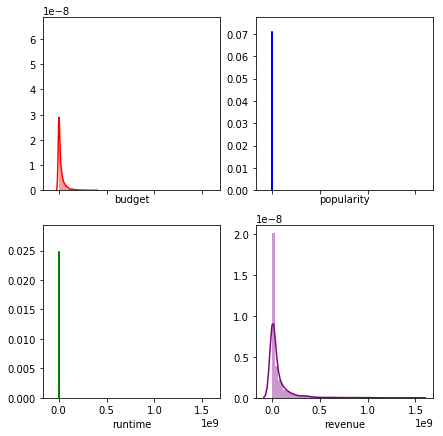

In [4]:
# lets plot the numerical columns

f, axes = plt.subplots(2,2, figsize = (7,7), sharex=  True)
sns.distplot( df.budget, color = 'r', ax=axes[0,0])
sns.distplot( df.popularity, color = 'b', ax=axes[0,1])
# ran into NaN errors with the below two
sns.distplot( df.runtime.fillna(0), color = 'g', ax=axes[1,0])
sns.distplot( df.revenue.fillna(0), color = 'purple', ax=axes[1,1])

print('budget and revenue is very skewed to the right. -> We need log transformation for better prediction')
#All of the below 4 columns need closer look 

In [5]:
df.popularity.describe()
df[df.popularity > 33] # there are 29 movies 
# yet I do not think these abnormally high popularity has to be accounted - these point to very famous movies


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
518,519,"[{'id': 468552, 'name': 'Wonder Woman Collecti...",149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,...,5/30/17,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",NaN,NaN,820580447
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
934,935,"[{'id': 404609, 'name': 'John Wick Collection'...",40000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.johnwick.movie/,tt4425200,en,John Wick: Chapter 2,John Wick is forced out of retirement by a for...,49.247505,...,2/8/17,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Never stab the devil in the back,John Wick: Chapter 2,"[{'id': 131, 'name': 'italy'}, {'id': 1419, 'n...",NaN,NaN,171539887
1093,1094,"[{'id': 230, 'name': 'The Godfather Collection...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,...,3/14/72,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...","[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093db', 'de...",245066411
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1140,1141,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0118799,it,La vita è bella,A touching story of an Italian book seller of ...,39.394970,...,12/20/97,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An unforgettable fable that proves love, famil...",Life Is Beautiful,"[{'id': 131, 'name': 'italy'}, {'id': 483, 'na...","[{'cast_id': 7, 'character': 'Dora', 'credit_i...","[{'credit_id': '52fe4262c3a36847f801a10b', 'de...",229400000
1309,1310,NaN,61000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.gonegirlmovie.com/,tt2267998,en,Gone Girl,With his wife's disappearance having become th...,154.801009,...,10/1/14,145.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You don't know what you've got 'til it's...,Gone Girl,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 7, 'character': 'Nick Dunne', 'cr...","[{'credit_id': '52fe

In [6]:
print("impute runtime with the mean value. we are missing 2 values. ")
df.runtime.describe()
df['runtime'] = df.runtime.fillna(df.runtime.mean())

df.runtime.describe()


impute runtime with the mean value. we are missing 2 values. 


count    3000.000000
mean      107.856571
std        22.079069
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

how is it possible that a movie has zero budget?
there are 812 movies with 0 budget - this is more than I thought. budgets are highly correlated with revenue. Imputing the values for budget would be very important for our analysis 


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
11,12,"[{'id': 48190, 'name': 'Revenge of the Nerds C...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0093857,en,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.543750,...,7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
17,18,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt1700845,en,The Invisible Woman,"In 1857, at the height of his fame and fortune...",4.183558,...,12/25/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His greatest story was the one he could never ...,The Invisible Woman,"[{'id': 5565, 'name': 'biography'}, {'id': 180...","[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2990,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,tt0206367,en,The Trumpet Of The Swan,The adventures of a young Trumpeter swan who c...,0.851599,...,5/11/01,75.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Sometimes being different helps you to find yo...,The Trumpet Of The Swan,"[{'id': 6653, 'name': 'trumpet'}, {'id': 10407...","[{'cast_id': 1, 'character': 'Father', 'credit...","[{'credit_id': '58bc9d609251416084044b0e', 'de...",100202
2990,2991,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0118663,en,B.A.P.S.,Can two clueless Georgia homegirls with big he...,1.560980,...,3/28/97,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,These Pretty Women... Are Clueless!,B.A.P.S.,"[{'id': 1437, 'name': 'burglar'}, {'id': 1946,...","[{'cast_id': 3, 'character': 'Nisi', 'credit_i...","[{'credit_id': '52fe477b9251416c7509af57', 'de...",7240837
2994,2995,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,...,9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddi

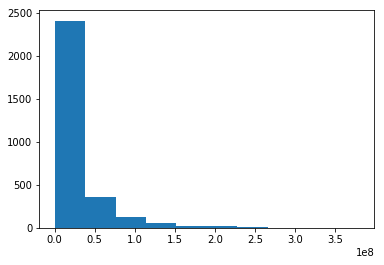

In [7]:
print('how is it possible that a movie has zero budget?')

plt.hist(df.budget)
df.budget.describe()
print('there are 812 movies with 0 budget - this is more than I thought. budgets are highly correlated with revenue. Imputing the values for budget would be very important for our analysis ')
df[df.budget == 0]


revenue is skewed to the right. In this cas, taking the log of revenue make it easier for model to study the variables.


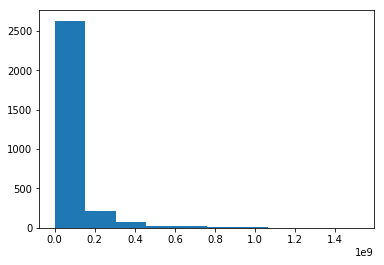

In [8]:
plt.hist(df.revenue)
df.revenue.describe()
print('revenue is skewed to the right. In this cas, taking the log of revenue make it easier for model to study the variables.')


## Feature Engineering

#### Caveat!!!

In [72]:
## I found the missing budgets from external source. Including this data would defnitely increase the precision 
## of the model. However, it is not possible to do the same for the complete data. I am unsure about using this data
## So feel free to dismiss this part of the notebook

df.loc[df['id'] == 16,'revenue'] = 192864         
df.loc[df['id'] == 90,'budget'] = 30000000                  
df.loc[df['id'] == 118,'budget'] = 60000000       
df.loc[df['id'] == 149,'budget'] = 18000000       
df.loc[df['id'] == 313,'revenue'] = 12000000       
df.loc[df['id'] == 451,'revenue'] = 12000000      
df.loc[df['id'] == 464,'budget'] = 20000000       
df.loc[df['id'] == 470,'budget'] = 13000000       
df.loc[df['id'] == 513,'budget'] = 930000         
df.loc[df['id'] == 797,'budget'] = 8000000        
df.loc[df['id'] == 819,'budget'] = 90000000       
df.loc[df['id'] == 850,'budget'] = 90000000       
df.loc[df['id'] == 1007,'budget'] = 2              
df.loc[df['id'] == 1112,'budget'] = 7500000       
df.loc[df['id'] == 1131,'budget'] = 4300000        
df.loc[df['id'] == 1359,'budget'] = 10000000       
df.loc[df['id'] == 1542,'budget'] = 1             
df.loc[df['id'] == 1570,'budget'] = 15800000       
df.loc[df['id'] == 1571,'budget'] = 4000000        
df.loc[df['id'] == 1714,'budget'] = 46000000       
df.loc[df['id'] == 1721,'budget'] = 17500000       
df.loc[df['id'] == 1865,'revenue'] = 25000000      
df.loc[df['id'] == 1885,'budget'] = 12             
df.loc[df['id'] == 2091,'budget'] = 10             
df.loc[df['id'] == 2268,'budget'] = 17500000       
df.loc[df['id'] == 2491,'budget'] = 6              
df.loc[df['id'] == 2602,'budget'] = 31000000       
df.loc[df['id'] == 2612,'budget'] = 15000000       
df.loc[df['id'] == 2696,'budget'] = 10000000      
df.loc[df['id'] == 2801,'budget'] = 10000000       
df.loc[df['id'] == 335,'budget'] = 2 
df.loc[df['id'] == 348,'budget'] = 12
df.loc[df['id'] == 470,'budget'] = 13000000 
df.loc[df['id'] == 513,'budget'] = 1100000
df.loc[df['id'] == 640,'budget'] = 6 
df.loc[df['id'] == 696,'budget'] = 1
df.loc[df['id'] == 797,'budget'] = 8000000 
df.loc[df['id'] == 850,'budget'] = 1500000
df.loc[df['id'] == 1199,'budget'] = 5 
df.loc[df['id'] == 1282,'budget'] = 9              
df.loc[df['id'] == 1347,'budget'] = 1
df.loc[df['id'] == 1755,'budget'] = 2
df.loc[df['id'] == 1801,'budget'] = 5
df.loc[df['id'] == 1918,'budget'] = 592 
df.loc[df['id'] == 2033,'budget'] = 4
df.loc[df['id'] == 2118,'budget'] = 344 
df.loc[df['id'] == 2252,'budget'] = 130
df.loc[df['id'] == 2256,'budget'] = 1 
df.loc[df['id'] == 2696,'budget'] = 10000000

In [73]:
df[categorical]
df[df.status == 'Rumored'] #only 4 values. Just remove
remove = ['id','imdb_id','homepage','overview','poster_path','spoken_languages','tagline','original_title','status']
#removed the above columns as they do not seem to affect the revenue
df1 = df.drop(columns=remove)
df1.head()
#noten that 'title' /  also needs to be removed - I will remove it at the end'

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [74]:
#fix release_date so that it will be ordinal 

import datetime as dt
df1['Date'] = pd.to_datetime(df['release_date'])
df1['Date'] = df1['Date'].map(dt.datetime.toordinal)

#df1 = df1.drop(columns = ['release_date'])
df1.head()


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue,Date
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,735649
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,731799
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,735516
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,734571
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,733443


seasonality can be easily seen from the plot. Date definitely needs more processing for higher precision


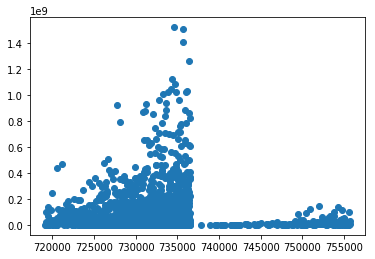

In [75]:
print("seasonality can be easily seen from the plot. Date definitely needs more processing for higher precision")

plt.scatter(df1.Date, df1.revenue)



In [76]:
# How do you format datetime? -> https://www.kaggle.com/shahules/eda-feature-engineering-and-keras-model/data
print( 'movie release date is very relevant to its revenue. i.e) holiday movies will be very profitable') 


from datetime import datetime
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
df1['release_date']=df1['release_date'].fillna('1/1/90').apply(lambda x: date(x))

df1.head()

movie release date is very relevant to its revenue. i.e) holiday movies will be very profitable


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue,Date
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,735649
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,731799
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,735516
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,734571
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,733443


In [77]:
df1['new_date']=df1['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
df1['release_month']=df1['new_date'].apply(lambda x:x.month)
df1['release_year']=df1['new_date'].apply(lambda x:x.year)

In [78]:
df1.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue,Date,new_date,release_month,release_year
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,735649,2015-02-20,2,2015
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,731799,2004-08-06,8,2004
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,735516,2014-10-10,10,2014
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,734571,2012-03-09,3,2012
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,733443,2009-02-05,2,2009


In [79]:
df1['belongs_to_collection'] = df1.belongs_to_collection.fillna(0)
df1['belongs_to_collection'] = df1.belongs_to_collection.apply(lambda x: 1 if x != 0 else 0 )
print('if the movie is in Marvel collection / Pixar collection, it might appeal to more people')
df1.head()

if the movie is in Marvel collection / Pixar collection, it might appeal to more people


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue,Date,new_date,release_month,release_year
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,735649,2015-02-20,2,2015
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,731799,2004-08-06,8,2004
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,735516,2014-10-10,10,2014
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,734571,2012-03-09,3,2012
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,733443,2009-02-05,2,2009


In [80]:
df1.original_language.value_counts()
# 2550 English and 450 other language
print('think I will put 1 for Eng and 0 for all others')

df1['lang'] = df1.original_language.apply(lambda x: 1 if x == 'en' else 0 )
df1.head()

think I will put 1 for Eng and 0 for all others


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,title,Keywords,cast,crew,revenue,Date,new_date,release_month,release_year,lang
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,735649,2015-02-20,2,2015,1
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,731799,2004-08-06,8,2004,1
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,735516,2014-10-10,10,2014,1
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,734571,2012-03-09,3,2012,0
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,733443,2009-02-05,2,2009,0


#### Taking care of Json formatted columns

In [81]:
# https://www.kaggle.com/shahules/eda-feature-engineering-and-keras-model
# The Json formatted columns were giving me hard time. So I borrowed the codes from the above notebook

import ast
dict_columns = ['genres', 'production_companies',
                'production_countries', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(df1)
for col in dict_columns:
       df1[col]=dfx[col]
        
    

In [82]:
#Lets take a look at how many genres are in 'genres' column

from collections import Counter

genres=df1['genres'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values

Counter([i for j in genres for i in j]).most_common(20)



[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [83]:
#Lets take a look at how many keywords are in 'keywords' column

keywords=df1['Keywords'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values


Counter([i for j in keywords for i in j]).most_common(20)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53)]

In [84]:
#Lets take a look at how many production companies are in the column

production_companies=df1['production_companies'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values

production_companies
Counter([i for j in production_companies for i in j]).most_common(20)


[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30)]

In [85]:
countries=df1['production_countries'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values
Counter([j for i in countries for j in i]).most_common(20)


[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15)]

In [86]:
# more on taking care of json formatted columns

json_cols = ['genres', 'production_companies', 'production_countries', 'Keywords']

def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(df1)

In [87]:
#remove columns with low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    for i in train_id.union(train_id):
        if train_dict[col][i] < 30 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
    
            
train_dict

{'genres': {'Comedy': 1028,
  'Drama': 1531,
  'Family': 260,
  'Romance': 571,
  'Thriller': 789,
  'Action': 741,
  'Animation': 141,
  'Adventure': 439,
  'Horror': 301,
  'Documentary': 87,
  'Music': 100,
  'Crime': 469,
  'Science Fiction': 290,
  'Mystery': 225,
  'Foreign': 31,
  'Fantasy': 232,
  'War': 100,
  'Western': 43,
  'History': 132},
 'production_companies': {'Paramount Pictures': 161,
  'United Artists': 44,
  'Metro-Goldwyn-Mayer (MGM)': 84,
  'Walt Disney Pictures': 62,
  'Twentieth Century Fox Film Corporation': 138,
  'BBC Films': 30,
  'Canal+': 46,
  'New Line Cinema': 75,
  'Universal Pictures': 188,
  'Warner Bros.': 202,
  'Columbia Pictures Corporation': 61,
  'TriStar Pictures': 53,
  'Columbia Pictures': 91,
  'Touchstone Pictures': 63,
  'Regency Enterprises': 31,
  'Miramax Films': 40,
  'Village Roadshow Pictures': 36,
  'Dune Entertainment': 30,
  'Relativity Media': 48,
  'Working Title Films': 30},
 'production_countries': {'United States of Americ

In [88]:
#global train_dict
for col in ['genres', 'production_countries', 'Keywords', 'production_companies'] :
    df1[col] = df1[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
    temp = df1[col].str.get_dummies(sep=',')
    df1 = pd.concat([df1, temp], axis=1, sort=False)

In [89]:
df2 = df1.drop(columns=['genres','production_companies','original_language','production_countries','release_date','title','Keywords','cast','crew','Date','new_date'] )
print(df2.columns)
df2.head()

Index(['belongs_to_collection', 'budget', 'popularity', 'runtime', 'revenue',
       'release_month', 'release_year', 'lang', 'Action', 'Adventure',
       ...
       'Touchstone Pictures', 'TriStar Pictures',
       'Twentieth Century Fox Film Corporation', 'United Artists',
       'Universal Pictures', 'Village Roadshow Pictures',
       'Walt Disney Pictures', 'Warner Bros.', 'Working Title Films',
       'production_companies_etc'],
      dtype='object', length=121)


,belongs_to_collection,budget,popularity,runtime,revenue,release_month,release_year,lang,Action,Adventure,...,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Working Title Films,production_companies_etc
0,1,14000000,6.575393,93.0,12314651,2,2015,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,40000000,8.248895,113.0,95149435,8,2004,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,3300000,64.299990,105.0,13092000,10,2014,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200000,3.174936,122.0,16000000,3,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.148070,118.0,3923970,2,2009,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#log-transform both budget and revenue - because they are skewed variables

df2['budget']=np.log1p(df2['budget'])
y=np.log1p(df2['revenue'])
df2 = df2.drop(columns=['revenue'])
df2.head()

,belongs_to_collection,budget,popularity,runtime,release_month,release_year,lang,Action,Adventure,Animation,...,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Working Title Films,production_companies_etc
0,1,16.454568,6.575393,93.0,2,2015,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,17.504390,8.248895,113.0,8,2004,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,15.009433,64.299990,105.0,10,2014,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,13.997833,3.174936,122.0,3,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000000,1.148070,118.0,2,2009,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y

0       16.326300
1       18.370959
2       16.387512
3       16.588099
4       15.182615
          ...    
2995    14.283442
2996    12.103990
2997    18.309266
2998    18.962792
2999    18.223292
Name: revenue, Length: 3000, dtype: float64

## Model Building

In [92]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df2)
    rmse= np.sqrt(-cross_val_score(model, df2, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



In [93]:
print('prior to budget impute, the Lasso score: 2.3499 (0.1120) ')

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


prior to budget impute, the Lasso score: 2.3499 (0.1120) 

Lasso score: 2.2549 (0.0854)



In [94]:
print('prior to budget impute, the ElasticNet score: 2.3573 (0.1137) ')
ENet = make_pipeline( ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

prior to budget impute, the ElasticNet score: 2.3573 (0.1137) 
ElasticNet score: 2.2551 (0.0854)



In [95]:
print('prior to budget impute, the Random Forest score: 2.2727 (0.0691)')
RandForr = RandomForestRegressor()
score =  rmsle_cv(RandForr)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

prior to budget impute, the Random Forest score: 2.2727 (0.0691)
Random Forest score: 2.1604 (0.0884)



In [96]:
print('prior to budget impute, the Kernel Ridge score: 2.4181 (0.1284)')
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

prior to budget impute, the Kernel Ridge score: 2.4181 (0.1284)
Kernel Ridge score: 2.2328 (0.1091)



In [97]:
print('prior to budget impute, the Gradient Boosting score: 2.1060 (0.0832)')
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

prior to budget impute, the Gradient Boosting score: 2.1060 (0.0832)
Gradient Boosting score: 1.9233 (0.0670)



In [98]:
import lightgbm as lgb

print('prior to budget impute, the LGB 2.4647 (0.1342)')
lgbmodel = lgb.LGBMRegressor(n_estimators=2000, objective='regression', metric='rmse',max_depth = 5,num_leaves=5, min_child_samples=100,learning_rate=0.001,
                             boosting = 'gbdt',min_data_in_leaf= 10,  feature_fraction = 0.2, bagging_freq = 1,
                             bagging_fraction = 0.9, importance_type='gain', lambda_l1 = 0.2, subsample=.8, 
                             colsample_bytree=.9, use_best_model=True)

score = rmsle_cv(lgbmodel)
print("LGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

prior to budget impute, the LGB 2.4647 (0.1342)
[LightGBM] [Warning] Unknown parameter: use_best_model
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.8 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] Unknown parameter: use_best_model
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting

In [99]:
import catboost as cat
print('prior to budget impute, the cat model score: 2.0686 (0.0903)')

catmodel = cat.CatBoostRegressor(iterations=2000, learning_rate=0.01, depth=5,loss_function = "RMSE", boost_from_average = True,
                                 colsample_bylevel=0.8,bagging_temperature = 0.2,metric_period = None )
score = rmsle_cv(catmodel)
print("CATmodel score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

prior to budget impute, the cat model score: 2.0686 (0.0903)
0:	learn: 3.0291654	total: 4.17ms	remaining: 8.35s
1:	learn: 3.0163127	total: 6.82ms	remaining: 6.81s
2:	learn: 3.0043752	total: 9.95ms	remaining: 6.62s
3:	learn: 2.9924903	total: 13ms	remaining: 6.48s
4:	learn: 2.9808359	total: 16.2ms	remaining: 6.46s
5:	learn: 2.9702163	total: 18.7ms	remaining: 6.21s
6:	learn: 2.9586973	total: 21.9ms	remaining: 6.23s
7:	learn: 2.9477502	total: 25.1ms	remaining: 6.26s
8:	learn: 2.9379773	total: 28.3ms	remaining: 6.26s
9:	learn: 2.9275161	total: 31.2ms	remaining: 6.21s
10:	learn: 2.9158116	total: 34.7ms	remaining: 6.28s
11:	learn: 2.9058102	total: 39.3ms	remaining: 6.5s
12:	learn: 2.8962655	total: 44ms	remaining: 6.72s
13:	learn: 2.8860364	total: 49.2ms	remaining: 6.98s
14:	learn: 2.8761347	total: 53.2ms	remaining: 7.04s
15:	learn: 2.8665997	total: 56.9ms	remaining: 7.05s
16:	learn: 2.8565693	total: 59.5ms	remaining: 6.94s
17:	learn: 2.8462231	total: 62ms	remaining: 6.83s
18:	learn: 2.8368740

198:	learn: 2.1525062	total: 551ms	remaining: 4.99s
199:	learn: 2.1516486	total: 554ms	remaining: 4.98s
200:	learn: 2.1507468	total: 556ms	remaining: 4.98s
201:	learn: 2.1496232	total: 559ms	remaining: 4.98s
202:	learn: 2.1486575	total: 562ms	remaining: 4.98s
203:	learn: 2.1474459	total: 565ms	remaining: 4.98s
204:	learn: 2.1463517	total: 569ms	remaining: 4.98s
205:	learn: 2.1450443	total: 573ms	remaining: 4.99s
206:	learn: 2.1439584	total: 577ms	remaining: 4.99s
207:	learn: 2.1428545	total: 580ms	remaining: 4.99s
208:	learn: 2.1400322	total: 581ms	remaining: 4.98s
209:	learn: 2.1362611	total: 585ms	remaining: 4.98s
210:	learn: 2.1329376	total: 588ms	remaining: 4.99s
211:	learn: 2.1315722	total: 592ms	remaining: 4.99s
212:	learn: 2.1302644	total: 595ms	remaining: 4.99s
213:	learn: 2.1290743	total: 598ms	remaining: 4.99s
214:	learn: 2.1280919	total: 600ms	remaining: 4.98s
215:	learn: 2.1257376	total: 603ms	remaining: 4.98s
216:	learn: 2.1248171	total: 605ms	remaining: 4.97s
217:	learn: 

372:	learn: 1.9680976	total: 1.12s	remaining: 4.91s
373:	learn: 1.9676829	total: 1.13s	remaining: 4.9s
374:	learn: 1.9671220	total: 1.13s	remaining: 4.89s
375:	learn: 1.9666325	total: 1.13s	remaining: 4.89s
376:	learn: 1.9661579	total: 1.13s	remaining: 4.88s
377:	learn: 1.9655326	total: 1.14s	remaining: 4.88s
378:	learn: 1.9648395	total: 1.14s	remaining: 4.87s
379:	learn: 1.9644392	total: 1.14s	remaining: 4.87s
380:	learn: 1.9637804	total: 1.15s	remaining: 4.87s
381:	learn: 1.9629936	total: 1.15s	remaining: 4.86s
382:	learn: 1.9625955	total: 1.15s	remaining: 4.86s
383:	learn: 1.9619941	total: 1.15s	remaining: 4.86s
384:	learn: 1.9616049	total: 1.16s	remaining: 4.85s
385:	learn: 1.9609898	total: 1.16s	remaining: 4.85s
386:	learn: 1.9606454	total: 1.16s	remaining: 4.84s
387:	learn: 1.9603453	total: 1.16s	remaining: 4.83s
388:	learn: 1.9598623	total: 1.17s	remaining: 4.83s
389:	learn: 1.9593358	total: 1.17s	remaining: 4.83s
390:	learn: 1.9589698	total: 1.17s	remaining: 4.83s
391:	learn: 1

579:	learn: 1.8625315	total: 1.7s	remaining: 4.16s
580:	learn: 1.8622840	total: 1.7s	remaining: 4.16s
581:	learn: 1.8621631	total: 1.76s	remaining: 4.29s
582:	learn: 1.8607104	total: 1.76s	remaining: 4.29s
583:	learn: 1.8604540	total: 1.77s	remaining: 4.29s
584:	learn: 1.8601236	total: 1.77s	remaining: 4.28s
585:	learn: 1.8598656	total: 1.77s	remaining: 4.28s
586:	learn: 1.8592962	total: 1.78s	remaining: 4.28s
587:	learn: 1.8585666	total: 1.78s	remaining: 4.28s
588:	learn: 1.8581389	total: 1.78s	remaining: 4.27s
589:	learn: 1.8578263	total: 1.78s	remaining: 4.27s
590:	learn: 1.8575885	total: 1.79s	remaining: 4.26s
591:	learn: 1.8571815	total: 1.79s	remaining: 4.26s
592:	learn: 1.8569784	total: 1.79s	remaining: 4.26s
593:	learn: 1.8565409	total: 1.8s	remaining: 4.26s
594:	learn: 1.8563489	total: 1.82s	remaining: 4.29s
595:	learn: 1.8550456	total: 1.83s	remaining: 4.3s
596:	learn: 1.8547306	total: 1.83s	remaining: 4.31s
597:	learn: 1.8544986	total: 1.84s	remaining: 4.32s
598:	learn: 1.85

783:	learn: 1.7737483	total: 2.42s	remaining: 3.75s
784:	learn: 1.7735099	total: 2.42s	remaining: 3.75s
785:	learn: 1.7731768	total: 2.43s	remaining: 3.75s
786:	learn: 1.7729157	total: 2.43s	remaining: 3.75s
787:	learn: 1.7722278	total: 2.44s	remaining: 3.75s
788:	learn: 1.7719681	total: 2.44s	remaining: 3.75s
789:	learn: 1.7718446	total: 2.44s	remaining: 3.74s
790:	learn: 1.7717393	total: 2.44s	remaining: 3.74s
791:	learn: 1.7708758	total: 2.45s	remaining: 3.74s
792:	learn: 1.7704759	total: 2.46s	remaining: 3.74s
793:	learn: 1.7700874	total: 2.46s	remaining: 3.73s
794:	learn: 1.7692745	total: 2.46s	remaining: 3.73s
795:	learn: 1.7689843	total: 2.46s	remaining: 3.73s
796:	learn: 1.7688583	total: 2.47s	remaining: 3.73s
797:	learn: 1.7680793	total: 2.47s	remaining: 3.73s
798:	learn: 1.7673101	total: 2.48s	remaining: 3.73s
799:	learn: 1.7669300	total: 2.49s	remaining: 3.73s
800:	learn: 1.7665502	total: 2.49s	remaining: 3.73s
801:	learn: 1.7663275	total: 2.5s	remaining: 3.73s
802:	learn: 1

961:	learn: 1.7020893	total: 3s	remaining: 3.23s
962:	learn: 1.7016219	total: 3s	remaining: 3.23s
963:	learn: 1.7010599	total: 3.01s	remaining: 3.23s
964:	learn: 1.7003381	total: 3.01s	remaining: 3.23s
965:	learn: 1.7001602	total: 3.01s	remaining: 3.22s
966:	learn: 1.6999913	total: 3.02s	remaining: 3.23s
967:	learn: 1.6997365	total: 3.02s	remaining: 3.22s
968:	learn: 1.6993810	total: 3.03s	remaining: 3.22s
969:	learn: 1.6990792	total: 3.03s	remaining: 3.22s
970:	learn: 1.6987925	total: 3.04s	remaining: 3.22s
971:	learn: 1.6985723	total: 3.04s	remaining: 3.22s
972:	learn: 1.6983829	total: 3.05s	remaining: 3.21s
973:	learn: 1.6981245	total: 3.05s	remaining: 3.21s
974:	learn: 1.6978379	total: 3.06s	remaining: 3.21s
975:	learn: 1.6977032	total: 3.06s	remaining: 3.21s
976:	learn: 1.6973356	total: 3.07s	remaining: 3.22s
977:	learn: 1.6970472	total: 3.08s	remaining: 3.22s
978:	learn: 1.6967044	total: 3.08s	remaining: 3.22s
979:	learn: 1.6963236	total: 3.09s	remaining: 3.21s
980:	learn: 1.6960

1129:	learn: 1.6522921	total: 3.57s	remaining: 2.75s
1130:	learn: 1.6521160	total: 3.57s	remaining: 2.75s
1131:	learn: 1.6517198	total: 3.58s	remaining: 2.74s
1132:	learn: 1.6513329	total: 3.58s	remaining: 2.74s
1133:	learn: 1.6510955	total: 3.58s	remaining: 2.74s
1134:	learn: 1.6509300	total: 3.59s	remaining: 2.73s
1135:	learn: 1.6507162	total: 3.59s	remaining: 2.73s
1136:	learn: 1.6505172	total: 3.59s	remaining: 2.73s
1137:	learn: 1.6500267	total: 3.6s	remaining: 2.72s
1138:	learn: 1.6497172	total: 3.6s	remaining: 2.72s
1139:	learn: 1.6495377	total: 3.61s	remaining: 2.72s
1140:	learn: 1.6491009	total: 3.62s	remaining: 2.72s
1141:	learn: 1.6489444	total: 3.62s	remaining: 2.72s
1142:	learn: 1.6487705	total: 3.62s	remaining: 2.72s
1143:	learn: 1.6484104	total: 3.63s	remaining: 2.71s
1144:	learn: 1.6481971	total: 3.63s	remaining: 2.71s
1145:	learn: 1.6479337	total: 3.63s	remaining: 2.71s
1146:	learn: 1.6475925	total: 3.64s	remaining: 2.7s
1147:	learn: 1.6472825	total: 3.64s	remaining: 2.

1303:	learn: 1.6077398	total: 4.14s	remaining: 2.21s
1304:	learn: 1.6075981	total: 4.14s	remaining: 2.21s
1305:	learn: 1.6073814	total: 4.14s	remaining: 2.2s
1306:	learn: 1.6072403	total: 4.15s	remaining: 2.2s
1307:	learn: 1.6069862	total: 4.15s	remaining: 2.2s
1308:	learn: 1.6067934	total: 4.16s	remaining: 2.19s
1309:	learn: 1.6065950	total: 4.16s	remaining: 2.19s
1310:	learn: 1.6064967	total: 4.16s	remaining: 2.19s
1311:	learn: 1.6060729	total: 4.16s	remaining: 2.18s
1312:	learn: 1.6059301	total: 4.16s	remaining: 2.18s
1313:	learn: 1.6054769	total: 4.17s	remaining: 2.17s
1314:	learn: 1.6051898	total: 4.17s	remaining: 2.17s
1315:	learn: 1.6050284	total: 4.17s	remaining: 2.17s
1316:	learn: 1.6048767	total: 4.18s	remaining: 2.17s
1317:	learn: 1.6045643	total: 4.18s	remaining: 2.16s
1318:	learn: 1.6043478	total: 4.18s	remaining: 2.16s
1319:	learn: 1.6040231	total: 4.18s	remaining: 2.15s
1320:	learn: 1.6038701	total: 4.19s	remaining: 2.15s
1321:	learn: 1.6036700	total: 4.19s	remaining: 2.

1513:	learn: 1.5598881	total: 4.7s	remaining: 1.51s
1514:	learn: 1.5595229	total: 4.71s	remaining: 1.51s
1515:	learn: 1.5593918	total: 4.71s	remaining: 1.5s
1516:	learn: 1.5591646	total: 4.71s	remaining: 1.5s
1517:	learn: 1.5590259	total: 4.71s	remaining: 1.5s
1518:	learn: 1.5588879	total: 4.72s	remaining: 1.49s
1519:	learn: 1.5587621	total: 4.72s	remaining: 1.49s
1520:	learn: 1.5585761	total: 4.72s	remaining: 1.49s
1521:	learn: 1.5582806	total: 4.73s	remaining: 1.48s
1522:	learn: 1.5579317	total: 4.73s	remaining: 1.48s
1523:	learn: 1.5577555	total: 4.73s	remaining: 1.48s
1524:	learn: 1.5575926	total: 4.74s	remaining: 1.48s
1525:	learn: 1.5574545	total: 4.74s	remaining: 1.47s
1526:	learn: 1.5571935	total: 4.74s	remaining: 1.47s
1527:	learn: 1.5570551	total: 4.74s	remaining: 1.47s
1528:	learn: 1.5568312	total: 4.75s	remaining: 1.46s
1529:	learn: 1.5565719	total: 4.75s	remaining: 1.46s
1530:	learn: 1.5564128	total: 4.75s	remaining: 1.46s
1531:	learn: 1.5563353	total: 4.75s	remaining: 1.4

1730:	learn: 1.5198799	total: 5.28s	remaining: 820ms
1731:	learn: 1.5196939	total: 5.28s	remaining: 817ms
1732:	learn: 1.5194367	total: 5.28s	remaining: 814ms
1733:	learn: 1.5192434	total: 5.29s	remaining: 811ms
1734:	learn: 1.5190434	total: 5.29s	remaining: 808ms
1735:	learn: 1.5188313	total: 5.29s	remaining: 805ms
1736:	learn: 1.5186768	total: 5.29s	remaining: 802ms
1737:	learn: 1.5185606	total: 5.3s	remaining: 799ms
1738:	learn: 1.5184600	total: 5.3s	remaining: 796ms
1739:	learn: 1.5181858	total: 5.3s	remaining: 793ms
1740:	learn: 1.5180858	total: 5.31s	remaining: 790ms
1741:	learn: 1.5177694	total: 5.31s	remaining: 786ms
1742:	learn: 1.5175740	total: 5.31s	remaining: 783ms
1743:	learn: 1.5174423	total: 5.32s	remaining: 780ms
1744:	learn: 1.5172700	total: 5.32s	remaining: 777ms
1745:	learn: 1.5170965	total: 5.32s	remaining: 774ms
1746:	learn: 1.5170007	total: 5.32s	remaining: 771ms
1747:	learn: 1.5166328	total: 5.33s	remaining: 768ms
1748:	learn: 1.5163898	total: 5.33s	remaining: 76

1958:	learn: 1.4840076	total: 5.85s	remaining: 122ms
1959:	learn: 1.4838000	total: 5.85s	remaining: 119ms
1960:	learn: 1.4837343	total: 5.86s	remaining: 116ms
1961:	learn: 1.4835053	total: 5.86s	remaining: 113ms
1962:	learn: 1.4833718	total: 5.86s	remaining: 110ms
1963:	learn: 1.4832837	total: 5.86s	remaining: 107ms
1964:	learn: 1.4831753	total: 5.87s	remaining: 105ms
1965:	learn: 1.4829686	total: 5.87s	remaining: 102ms
1966:	learn: 1.4828209	total: 5.87s	remaining: 98.5ms
1967:	learn: 1.4827153	total: 5.88s	remaining: 95.5ms
1968:	learn: 1.4826204	total: 5.88s	remaining: 92.6ms
1969:	learn: 1.4821707	total: 5.88s	remaining: 89.6ms
1970:	learn: 1.4820057	total: 5.88s	remaining: 86.6ms
1971:	learn: 1.4818700	total: 5.89s	remaining: 83.6ms
1972:	learn: 1.4818051	total: 5.89s	remaining: 80.6ms
1973:	learn: 1.4815363	total: 5.89s	remaining: 77.6ms
1974:	learn: 1.4815066	total: 5.89s	remaining: 74.6ms
1975:	learn: 1.4813654	total: 5.9s	remaining: 71.6ms
1976:	learn: 1.4812043	total: 5.9s	re

123:	learn: 2.2455601	total: 400ms	remaining: 6.05s
124:	learn: 2.2432456	total: 404ms	remaining: 6.05s
125:	learn: 2.2407565	total: 407ms	remaining: 6.06s
126:	learn: 2.2382179	total: 414ms	remaining: 6.11s
127:	learn: 2.2339766	total: 425ms	remaining: 6.21s
128:	learn: 2.2315255	total: 428ms	remaining: 6.21s
129:	learn: 2.2291385	total: 434ms	remaining: 6.24s
130:	learn: 2.2271719	total: 436ms	remaining: 6.22s
131:	learn: 2.2255589	total: 439ms	remaining: 6.21s
132:	learn: 2.2225175	total: 442ms	remaining: 6.21s
133:	learn: 2.2208678	total: 446ms	remaining: 6.21s
134:	learn: 2.2186948	total: 450ms	remaining: 6.22s
135:	learn: 2.2164225	total: 453ms	remaining: 6.21s
136:	learn: 2.2144800	total: 456ms	remaining: 6.2s
137:	learn: 2.2127611	total: 459ms	remaining: 6.19s
138:	learn: 2.2103275	total: 461ms	remaining: 6.18s
139:	learn: 2.2076099	total: 464ms	remaining: 6.17s
140:	learn: 2.2052405	total: 467ms	remaining: 6.15s
141:	learn: 2.2033814	total: 469ms	remaining: 6.14s
142:	learn: 2

296:	learn: 2.0028264	total: 981ms	remaining: 5.63s
297:	learn: 2.0022678	total: 985ms	remaining: 5.62s
298:	learn: 2.0016507	total: 988ms	remaining: 5.62s
299:	learn: 2.0011062	total: 991ms	remaining: 5.61s
300:	learn: 2.0002387	total: 994ms	remaining: 5.61s
301:	learn: 1.9996380	total: 996ms	remaining: 5.6s
302:	learn: 1.9990860	total: 999ms	remaining: 5.59s
303:	learn: 1.9974274	total: 1s	remaining: 5.59s
304:	learn: 1.9965323	total: 1s	remaining: 5.59s
305:	learn: 1.9958201	total: 1.01s	remaining: 5.58s
306:	learn: 1.9952361	total: 1.01s	remaining: 5.57s
307:	learn: 1.9947247	total: 1.01s	remaining: 5.57s
308:	learn: 1.9941467	total: 1.02s	remaining: 5.56s
309:	learn: 1.9933687	total: 1.02s	remaining: 5.56s
310:	learn: 1.9929504	total: 1.02s	remaining: 5.57s
311:	learn: 1.9924896	total: 1.03s	remaining: 5.56s
312:	learn: 1.9916954	total: 1.03s	remaining: 5.56s
313:	learn: 1.9910847	total: 1.03s	remaining: 5.55s
314:	learn: 1.9906748	total: 1.03s	remaining: 5.54s
315:	learn: 1.99024

492:	learn: 1.8914599	total: 1.55s	remaining: 4.73s
493:	learn: 1.8912229	total: 1.55s	remaining: 4.73s
494:	learn: 1.8910442	total: 1.55s	remaining: 4.73s
495:	learn: 1.8908314	total: 1.56s	remaining: 4.72s
496:	learn: 1.8904663	total: 1.56s	remaining: 4.72s
497:	learn: 1.8902543	total: 1.56s	remaining: 4.72s
498:	learn: 1.8900334	total: 1.57s	remaining: 4.71s
499:	learn: 1.8897703	total: 1.57s	remaining: 4.71s
500:	learn: 1.8892431	total: 1.57s	remaining: 4.71s
501:	learn: 1.8888496	total: 1.57s	remaining: 4.7s
502:	learn: 1.8886998	total: 1.58s	remaining: 4.7s
503:	learn: 1.8881715	total: 1.58s	remaining: 4.69s
504:	learn: 1.8877363	total: 1.58s	remaining: 4.69s
505:	learn: 1.8872945	total: 1.59s	remaining: 4.69s
506:	learn: 1.8870685	total: 1.59s	remaining: 4.68s
507:	learn: 1.8866370	total: 1.59s	remaining: 4.68s
508:	learn: 1.8863847	total: 1.59s	remaining: 4.67s
509:	learn: 1.8861690	total: 1.6s	remaining: 4.67s
510:	learn: 1.8858224	total: 1.6s	remaining: 4.66s
511:	learn: 1.88

688:	learn: 1.8161823	total: 2.12s	remaining: 4.04s
689:	learn: 1.8159885	total: 2.13s	remaining: 4.04s
690:	learn: 1.8157653	total: 2.13s	remaining: 4.04s
691:	learn: 1.8154799	total: 2.13s	remaining: 4.04s
692:	learn: 1.8150605	total: 2.14s	remaining: 4.03s
693:	learn: 1.8147321	total: 2.14s	remaining: 4.03s
694:	learn: 1.8145481	total: 2.14s	remaining: 4.03s
695:	learn: 1.8143366	total: 2.15s	remaining: 4.03s
696:	learn: 1.8140281	total: 2.15s	remaining: 4.02s
697:	learn: 1.8130614	total: 2.15s	remaining: 4.02s
698:	learn: 1.8126580	total: 2.16s	remaining: 4.01s
699:	learn: 1.8122842	total: 2.16s	remaining: 4.01s
700:	learn: 1.8118707	total: 2.16s	remaining: 4.01s
701:	learn: 1.8115045	total: 2.17s	remaining: 4.01s
702:	learn: 1.8112706	total: 2.17s	remaining: 4s
703:	learn: 1.8111645	total: 2.17s	remaining: 4s
704:	learn: 1.8107713	total: 2.18s	remaining: 4s
705:	learn: 1.8104885	total: 2.18s	remaining: 4s
706:	learn: 1.8100432	total: 2.18s	remaining: 3.99s
707:	learn: 1.8098516	to

857:	learn: 1.7503261	total: 2.69s	remaining: 3.58s
858:	learn: 1.7501158	total: 2.69s	remaining: 3.58s
859:	learn: 1.7499142	total: 2.7s	remaining: 3.58s
860:	learn: 1.7495696	total: 2.7s	remaining: 3.57s
861:	learn: 1.7491540	total: 2.71s	remaining: 3.57s
862:	learn: 1.7488028	total: 2.71s	remaining: 3.57s
863:	learn: 1.7484351	total: 2.71s	remaining: 3.57s
864:	learn: 1.7480444	total: 2.71s	remaining: 3.56s
865:	learn: 1.7478560	total: 2.72s	remaining: 3.56s
866:	learn: 1.7473262	total: 2.72s	remaining: 3.56s
867:	learn: 1.7470827	total: 2.73s	remaining: 3.56s
868:	learn: 1.7467506	total: 2.73s	remaining: 3.55s
869:	learn: 1.7461315	total: 2.73s	remaining: 3.55s
870:	learn: 1.7454060	total: 2.74s	remaining: 3.55s
871:	learn: 1.7452356	total: 2.74s	remaining: 3.54s
872:	learn: 1.7450555	total: 2.74s	remaining: 3.54s
873:	learn: 1.7442450	total: 2.75s	remaining: 3.54s
874:	learn: 1.7437151	total: 2.75s	remaining: 3.54s
875:	learn: 1.7434185	total: 2.75s	remaining: 3.53s
876:	learn: 1.

1015:	learn: 1.6939881	total: 3.28s	remaining: 3.17s
1016:	learn: 1.6936036	total: 3.28s	remaining: 3.17s
1017:	learn: 1.6930530	total: 3.29s	remaining: 3.17s
1018:	learn: 1.6929419	total: 3.29s	remaining: 3.17s
1019:	learn: 1.6925773	total: 3.29s	remaining: 3.16s
1020:	learn: 1.6920279	total: 3.29s	remaining: 3.16s
1021:	learn: 1.6919124	total: 3.3s	remaining: 3.16s
1022:	learn: 1.6912695	total: 3.3s	remaining: 3.15s
1023:	learn: 1.6910477	total: 3.31s	remaining: 3.15s
1024:	learn: 1.6909202	total: 3.31s	remaining: 3.15s
1025:	learn: 1.6906016	total: 3.31s	remaining: 3.15s
1026:	learn: 1.6904699	total: 3.32s	remaining: 3.14s
1027:	learn: 1.6900255	total: 3.32s	remaining: 3.14s
1028:	learn: 1.6899356	total: 3.32s	remaining: 3.14s
1029:	learn: 1.6897172	total: 3.33s	remaining: 3.13s
1030:	learn: 1.6891684	total: 3.33s	remaining: 3.13s
1031:	learn: 1.6890182	total: 3.33s	remaining: 3.13s
1032:	learn: 1.6887013	total: 3.34s	remaining: 3.12s
1033:	learn: 1.6884532	total: 3.34s	remaining: 3

1186:	learn: 1.6480046	total: 3.85s	remaining: 2.63s
1187:	learn: 1.6476241	total: 3.85s	remaining: 2.63s
1188:	learn: 1.6473176	total: 3.85s	remaining: 2.63s
1189:	learn: 1.6471491	total: 3.86s	remaining: 2.63s
1190:	learn: 1.6470316	total: 3.86s	remaining: 2.62s
1191:	learn: 1.6468198	total: 3.86s	remaining: 2.62s
1192:	learn: 1.6466392	total: 3.87s	remaining: 2.62s
1193:	learn: 1.6464457	total: 3.87s	remaining: 2.61s
1194:	learn: 1.6460622	total: 3.88s	remaining: 2.61s
1195:	learn: 1.6458948	total: 3.88s	remaining: 2.61s
1196:	learn: 1.6456689	total: 3.88s	remaining: 2.61s
1197:	learn: 1.6453657	total: 3.89s	remaining: 2.6s
1198:	learn: 1.6451154	total: 3.89s	remaining: 2.6s
1199:	learn: 1.6449559	total: 3.9s	remaining: 2.6s
1200:	learn: 1.6447791	total: 3.9s	remaining: 2.59s
1201:	learn: 1.6445788	total: 3.9s	remaining: 2.59s
1202:	learn: 1.6444663	total: 3.9s	remaining: 2.59s
1203:	learn: 1.6443358	total: 3.91s	remaining: 2.58s
1204:	learn: 1.6440546	total: 3.91s	remaining: 2.58s


1352:	learn: 1.6078650	total: 4.41s	remaining: 2.11s
1353:	learn: 1.6077049	total: 4.42s	remaining: 2.11s
1354:	learn: 1.6076122	total: 4.42s	remaining: 2.1s
1355:	learn: 1.6074517	total: 4.42s	remaining: 2.1s
1356:	learn: 1.6071841	total: 4.43s	remaining: 2.1s
1357:	learn: 1.6070102	total: 4.43s	remaining: 2.1s
1358:	learn: 1.6068437	total: 4.43s	remaining: 2.09s
1359:	learn: 1.6065611	total: 4.44s	remaining: 2.09s
1360:	learn: 1.6063391	total: 4.45s	remaining: 2.09s
1361:	learn: 1.6060679	total: 4.45s	remaining: 2.08s
1362:	learn: 1.6058495	total: 4.45s	remaining: 2.08s
1363:	learn: 1.6056986	total: 4.45s	remaining: 2.08s
1364:	learn: 1.6054323	total: 4.46s	remaining: 2.07s
1365:	learn: 1.6053287	total: 4.46s	remaining: 2.07s
1366:	learn: 1.6049173	total: 4.47s	remaining: 2.07s
1367:	learn: 1.6048207	total: 4.47s	remaining: 2.06s
1368:	learn: 1.6046646	total: 4.47s	remaining: 2.06s
1369:	learn: 1.6044038	total: 4.48s	remaining: 2.06s
1370:	learn: 1.6042497	total: 4.48s	remaining: 2.0

1516:	learn: 1.5733949	total: 4.98s	remaining: 1.59s
1517:	learn: 1.5732472	total: 4.99s	remaining: 1.58s
1518:	learn: 1.5730404	total: 4.99s	remaining: 1.58s
1519:	learn: 1.5727874	total: 5s	remaining: 1.58s
1520:	learn: 1.5725198	total: 5s	remaining: 1.57s
1521:	learn: 1.5722989	total: 5s	remaining: 1.57s
1522:	learn: 1.5719073	total: 5.01s	remaining: 1.57s
1523:	learn: 1.5718033	total: 5.01s	remaining: 1.56s
1524:	learn: 1.5717592	total: 5.02s	remaining: 1.56s
1525:	learn: 1.5714250	total: 5.02s	remaining: 1.56s
1526:	learn: 1.5712547	total: 5.03s	remaining: 1.56s
1527:	learn: 1.5710968	total: 5.03s	remaining: 1.55s
1528:	learn: 1.5708907	total: 5.03s	remaining: 1.55s
1529:	learn: 1.5706689	total: 5.03s	remaining: 1.55s
1530:	learn: 1.5704933	total: 5.04s	remaining: 1.54s
1531:	learn: 1.5702926	total: 5.04s	remaining: 1.54s
1532:	learn: 1.5700837	total: 5.04s	remaining: 1.54s
1533:	learn: 1.5697914	total: 5.05s	remaining: 1.53s
1534:	learn: 1.5695859	total: 5.05s	remaining: 1.53s
15

1677:	learn: 1.5438796	total: 5.55s	remaining: 1.06s
1678:	learn: 1.5437314	total: 5.56s	remaining: 1.06s
1679:	learn: 1.5436791	total: 5.56s	remaining: 1.06s
1680:	learn: 1.5436137	total: 5.57s	remaining: 1.06s
1681:	learn: 1.5433014	total: 5.57s	remaining: 1.05s
1682:	learn: 1.5430742	total: 5.58s	remaining: 1.05s
1683:	learn: 1.5429483	total: 5.58s	remaining: 1.05s
1684:	learn: 1.5427250	total: 5.58s	remaining: 1.04s
1685:	learn: 1.5425285	total: 5.59s	remaining: 1.04s
1686:	learn: 1.5424090	total: 5.59s	remaining: 1.04s
1687:	learn: 1.5421084	total: 5.59s	remaining: 1.03s
1688:	learn: 1.5419829	total: 5.6s	remaining: 1.03s
1689:	learn: 1.5417318	total: 5.61s	remaining: 1.03s
1690:	learn: 1.5415763	total: 5.61s	remaining: 1.02s
1691:	learn: 1.5414418	total: 5.61s	remaining: 1.02s
1692:	learn: 1.5411606	total: 5.61s	remaining: 1.02s
1693:	learn: 1.5408668	total: 5.61s	remaining: 1.01s
1694:	learn: 1.5407304	total: 5.62s	remaining: 1.01s
1695:	learn: 1.5406736	total: 5.62s	remaining: 

1848:	learn: 1.5162971	total: 6.13s	remaining: 501ms
1849:	learn: 1.5161488	total: 6.13s	remaining: 497ms
1850:	learn: 1.5160702	total: 6.14s	remaining: 494ms
1851:	learn: 1.5159950	total: 6.14s	remaining: 491ms
1852:	learn: 1.5158763	total: 6.14s	remaining: 488ms
1853:	learn: 1.5156313	total: 6.15s	remaining: 484ms
1854:	learn: 1.5155712	total: 6.15s	remaining: 481ms
1855:	learn: 1.5153689	total: 6.15s	remaining: 478ms
1856:	learn: 1.5152167	total: 6.16s	remaining: 474ms
1857:	learn: 1.5151264	total: 6.16s	remaining: 471ms
1858:	learn: 1.5148422	total: 6.16s	remaining: 467ms
1859:	learn: 1.5146902	total: 6.17s	remaining: 464ms
1860:	learn: 1.5145785	total: 6.17s	remaining: 461ms
1861:	learn: 1.5144609	total: 6.18s	remaining: 458ms
1862:	learn: 1.5143733	total: 6.18s	remaining: 454ms
1863:	learn: 1.5140130	total: 6.18s	remaining: 451ms
1864:	learn: 1.5137029	total: 6.19s	remaining: 448ms
1865:	learn: 1.5135108	total: 6.19s	remaining: 445ms
1866:	learn: 1.5134028	total: 6.19s	remaining:

6:	learn: 2.9726540	total: 23.5ms	remaining: 6.68s
7:	learn: 2.9623105	total: 25.9ms	remaining: 6.45s
8:	learn: 2.9513998	total: 28.3ms	remaining: 6.25s
9:	learn: 2.9415250	total: 31.4ms	remaining: 6.26s
10:	learn: 2.9303744	total: 34.5ms	remaining: 6.24s
11:	learn: 2.9196813	total: 37.4ms	remaining: 6.19s
12:	learn: 2.9089990	total: 41ms	remaining: 6.27s
13:	learn: 2.8977227	total: 44.6ms	remaining: 6.33s
14:	learn: 2.8871841	total: 47.6ms	remaining: 6.3s
15:	learn: 2.8779626	total: 51ms	remaining: 6.32s
16:	learn: 2.8669213	total: 54.9ms	remaining: 6.41s
17:	learn: 2.8573234	total: 57.5ms	remaining: 6.33s
18:	learn: 2.8480326	total: 60.5ms	remaining: 6.31s
19:	learn: 2.8387923	total: 63.4ms	remaining: 6.27s
20:	learn: 2.8291756	total: 66.3ms	remaining: 6.24s
21:	learn: 2.8193640	total: 72.3ms	remaining: 6.5s
22:	learn: 2.8101278	total: 75.8ms	remaining: 6.51s
23:	learn: 2.8013425	total: 85.8ms	remaining: 7.06s
24:	learn: 2.7914628	total: 89ms	remaining: 7.03s
25:	learn: 2.7832045	tot

207:	learn: 2.1411106	total: 595ms	remaining: 5.12s
208:	learn: 2.1400815	total: 598ms	remaining: 5.12s
209:	learn: 2.1383240	total: 601ms	remaining: 5.12s
210:	learn: 2.1369443	total: 606ms	remaining: 5.14s
211:	learn: 2.1361891	total: 609ms	remaining: 5.13s
212:	learn: 2.1351234	total: 612ms	remaining: 5.13s
213:	learn: 2.1339537	total: 615ms	remaining: 5.13s
214:	learn: 2.1328966	total: 618ms	remaining: 5.13s
215:	learn: 2.1321363	total: 622ms	remaining: 5.13s
216:	learn: 2.1310383	total: 625ms	remaining: 5.13s
217:	learn: 2.1288771	total: 627ms	remaining: 5.13s
218:	learn: 2.1273666	total: 630ms	remaining: 5.12s
219:	learn: 2.1262700	total: 633ms	remaining: 5.12s
220:	learn: 2.1248088	total: 636ms	remaining: 5.12s
221:	learn: 2.1238930	total: 639ms	remaining: 5.12s
222:	learn: 2.1215745	total: 642ms	remaining: 5.12s
223:	learn: 2.1207261	total: 644ms	remaining: 5.11s
224:	learn: 2.1198463	total: 647ms	remaining: 5.1s
225:	learn: 2.1189130	total: 651ms	remaining: 5.11s
226:	learn: 2

418:	learn: 1.9658074	total: 1.17s	remaining: 4.4s
419:	learn: 1.9655275	total: 1.17s	remaining: 4.4s
420:	learn: 1.9648196	total: 1.17s	remaining: 4.4s
421:	learn: 1.9643528	total: 1.18s	remaining: 4.39s
422:	learn: 1.9637594	total: 1.18s	remaining: 4.39s
423:	learn: 1.9632449	total: 1.18s	remaining: 4.39s
424:	learn: 1.9629285	total: 1.18s	remaining: 4.39s
425:	learn: 1.9625823	total: 1.19s	remaining: 4.39s
426:	learn: 1.9621975	total: 1.19s	remaining: 4.38s
427:	learn: 1.9613222	total: 1.19s	remaining: 4.38s
428:	learn: 1.9607130	total: 1.2s	remaining: 4.38s
429:	learn: 1.9602214	total: 1.2s	remaining: 4.37s
430:	learn: 1.9599360	total: 1.2s	remaining: 4.37s
431:	learn: 1.9595155	total: 1.2s	remaining: 4.37s
432:	learn: 1.9579141	total: 1.21s	remaining: 4.36s
433:	learn: 1.9576187	total: 1.21s	remaining: 4.36s
434:	learn: 1.9572557	total: 1.21s	remaining: 4.36s
435:	learn: 1.9568607	total: 1.21s	remaining: 4.35s
436:	learn: 1.9565004	total: 1.22s	remaining: 4.35s
437:	learn: 1.95605

592:	learn: 1.8894688	total: 1.74s	remaining: 4.13s
593:	learn: 1.8881821	total: 1.74s	remaining: 4.13s
594:	learn: 1.8876305	total: 1.75s	remaining: 4.13s
595:	learn: 1.8872990	total: 1.75s	remaining: 4.13s
596:	learn: 1.8870292	total: 1.76s	remaining: 4.13s
597:	learn: 1.8866498	total: 1.76s	remaining: 4.13s
598:	learn: 1.8862738	total: 1.76s	remaining: 4.13s
599:	learn: 1.8857622	total: 1.77s	remaining: 4.13s
600:	learn: 1.8852060	total: 1.77s	remaining: 4.12s
601:	learn: 1.8848998	total: 1.77s	remaining: 4.12s
602:	learn: 1.8846428	total: 1.78s	remaining: 4.12s
603:	learn: 1.8845362	total: 1.78s	remaining: 4.12s
604:	learn: 1.8843037	total: 1.78s	remaining: 4.12s
605:	learn: 1.8840791	total: 1.79s	remaining: 4.11s
606:	learn: 1.8840218	total: 1.79s	remaining: 4.11s
607:	learn: 1.8837521	total: 1.79s	remaining: 4.11s
608:	learn: 1.8835664	total: 1.8s	remaining: 4.11s
609:	learn: 1.8830221	total: 1.8s	remaining: 4.11s
610:	learn: 1.8828648	total: 1.81s	remaining: 4.11s
611:	learn: 1.

796:	learn: 1.8187371	total: 2.5s	remaining: 3.78s
797:	learn: 1.8185409	total: 2.51s	remaining: 3.77s
798:	learn: 1.8182643	total: 2.51s	remaining: 3.77s
799:	learn: 1.8178540	total: 2.51s	remaining: 3.77s
800:	learn: 1.8173765	total: 2.52s	remaining: 3.77s
801:	learn: 1.8164900	total: 2.52s	remaining: 3.77s
802:	learn: 1.8163089	total: 2.52s	remaining: 3.76s
803:	learn: 1.8161456	total: 2.53s	remaining: 3.76s
804:	learn: 1.8157458	total: 2.54s	remaining: 3.76s
805:	learn: 1.8157021	total: 2.54s	remaining: 3.76s
806:	learn: 1.8156548	total: 2.54s	remaining: 3.75s
807:	learn: 1.8150784	total: 2.54s	remaining: 3.75s
808:	learn: 1.8147912	total: 2.55s	remaining: 3.75s
809:	learn: 1.8143853	total: 2.55s	remaining: 3.75s
810:	learn: 1.8134003	total: 2.55s	remaining: 3.74s
811:	learn: 1.8132443	total: 2.56s	remaining: 3.74s
812:	learn: 1.8131169	total: 2.56s	remaining: 3.74s
813:	learn: 1.8127753	total: 2.57s	remaining: 3.74s
814:	learn: 1.8124837	total: 2.57s	remaining: 3.73s
815:	learn: 1

956:	learn: 1.7626654	total: 3.07s	remaining: 3.34s
957:	learn: 1.7623528	total: 3.07s	remaining: 3.34s
958:	learn: 1.7616875	total: 3.07s	remaining: 3.33s
959:	learn: 1.7612968	total: 3.07s	remaining: 3.33s
960:	learn: 1.7605762	total: 3.08s	remaining: 3.33s
961:	learn: 1.7602327	total: 3.08s	remaining: 3.32s
962:	learn: 1.7600456	total: 3.08s	remaining: 3.32s
963:	learn: 1.7597937	total: 3.09s	remaining: 3.32s
964:	learn: 1.7594277	total: 3.09s	remaining: 3.31s
965:	learn: 1.7591292	total: 3.1s	remaining: 3.31s
966:	learn: 1.7585044	total: 3.1s	remaining: 3.31s
967:	learn: 1.7579548	total: 3.1s	remaining: 3.31s
968:	learn: 1.7573087	total: 3.11s	remaining: 3.31s
969:	learn: 1.7568412	total: 3.11s	remaining: 3.3s
970:	learn: 1.7566292	total: 3.11s	remaining: 3.3s
971:	learn: 1.7561648	total: 3.12s	remaining: 3.3s
972:	learn: 1.7557342	total: 3.12s	remaining: 3.29s
973:	learn: 1.7555773	total: 3.13s	remaining: 3.29s
974:	learn: 1.7550234	total: 3.13s	remaining: 3.29s
975:	learn: 1.7546

1120:	learn: 1.7114623	total: 3.63s	remaining: 2.85s
1121:	learn: 1.7108070	total: 3.64s	remaining: 2.85s
1122:	learn: 1.7106072	total: 3.64s	remaining: 2.85s
1123:	learn: 1.7102715	total: 3.65s	remaining: 2.84s
1124:	learn: 1.7101282	total: 3.65s	remaining: 2.84s
1125:	learn: 1.7098173	total: 3.65s	remaining: 2.84s
1126:	learn: 1.7097169	total: 3.66s	remaining: 2.83s
1127:	learn: 1.7094842	total: 3.66s	remaining: 2.83s
1128:	learn: 1.7092471	total: 3.67s	remaining: 2.83s
1129:	learn: 1.7090834	total: 3.67s	remaining: 2.83s
1130:	learn: 1.7089196	total: 3.67s	remaining: 2.82s
1131:	learn: 1.7083609	total: 3.68s	remaining: 2.82s
1132:	learn: 1.7079787	total: 3.68s	remaining: 2.82s
1133:	learn: 1.7078194	total: 3.68s	remaining: 2.81s
1134:	learn: 1.7075583	total: 3.69s	remaining: 2.81s
1135:	learn: 1.7070703	total: 3.69s	remaining: 2.81s
1136:	learn: 1.7067332	total: 3.69s	remaining: 2.8s
1137:	learn: 1.7062908	total: 3.7s	remaining: 2.8s
1138:	learn: 1.7059561	total: 3.7s	remaining: 2.8

1283:	learn: 1.6643882	total: 4.21s	remaining: 2.35s
1284:	learn: 1.6643134	total: 4.21s	remaining: 2.34s
1285:	learn: 1.6639175	total: 4.21s	remaining: 2.34s
1286:	learn: 1.6635247	total: 4.22s	remaining: 2.34s
1287:	learn: 1.6631366	total: 4.22s	remaining: 2.33s
1288:	learn: 1.6628521	total: 4.23s	remaining: 2.33s
1289:	learn: 1.6626661	total: 4.23s	remaining: 2.33s
1290:	learn: 1.6623867	total: 4.24s	remaining: 2.33s
1291:	learn: 1.6619802	total: 4.24s	remaining: 2.32s
1292:	learn: 1.6618768	total: 4.24s	remaining: 2.32s
1293:	learn: 1.6616448	total: 4.24s	remaining: 2.31s
1294:	learn: 1.6613964	total: 4.25s	remaining: 2.31s
1295:	learn: 1.6610749	total: 4.25s	remaining: 2.31s
1296:	learn: 1.6609820	total: 4.25s	remaining: 2.31s
1297:	learn: 1.6607408	total: 4.26s	remaining: 2.3s
1298:	learn: 1.6603116	total: 4.26s	remaining: 2.3s
1299:	learn: 1.6600615	total: 4.26s	remaining: 2.3s
1300:	learn: 1.6596035	total: 4.27s	remaining: 2.29s
1301:	learn: 1.6593833	total: 4.27s	remaining: 2.

1443:	learn: 1.6270643	total: 4.78s	remaining: 1.84s
1444:	learn: 1.6268233	total: 4.78s	remaining: 1.84s
1445:	learn: 1.6267395	total: 4.79s	remaining: 1.83s
1446:	learn: 1.6265425	total: 4.79s	remaining: 1.83s
1447:	learn: 1.6262867	total: 4.79s	remaining: 1.83s
1448:	learn: 1.6261508	total: 4.79s	remaining: 1.82s
1449:	learn: 1.6260675	total: 4.8s	remaining: 1.82s
1450:	learn: 1.6258919	total: 4.8s	remaining: 1.82s
1451:	learn: 1.6255830	total: 4.8s	remaining: 1.81s
1452:	learn: 1.6253598	total: 4.81s	remaining: 1.81s
1453:	learn: 1.6250797	total: 4.81s	remaining: 1.81s
1454:	learn: 1.6249210	total: 4.82s	remaining: 1.8s
1455:	learn: 1.6248614	total: 4.82s	remaining: 1.8s
1456:	learn: 1.6246600	total: 4.82s	remaining: 1.8s
1457:	learn: 1.6244955	total: 4.82s	remaining: 1.79s
1458:	learn: 1.6242631	total: 4.83s	remaining: 1.79s
1459:	learn: 1.6241250	total: 4.83s	remaining: 1.79s
1460:	learn: 1.6239787	total: 4.83s	remaining: 1.78s
1461:	learn: 1.6237476	total: 4.83s	remaining: 1.78s

1613:	learn: 1.5916187	total: 5.35s	remaining: 1.28s
1614:	learn: 1.5914673	total: 5.35s	remaining: 1.27s
1615:	learn: 1.5911497	total: 5.35s	remaining: 1.27s
1616:	learn: 1.5910253	total: 5.36s	remaining: 1.27s
1617:	learn: 1.5909396	total: 5.36s	remaining: 1.26s
1618:	learn: 1.5907812	total: 5.36s	remaining: 1.26s
1619:	learn: 1.5906208	total: 5.37s	remaining: 1.26s
1620:	learn: 1.5905200	total: 5.37s	remaining: 1.25s
1621:	learn: 1.5903406	total: 5.38s	remaining: 1.25s
1622:	learn: 1.5901760	total: 5.38s	remaining: 1.25s
1623:	learn: 1.5898084	total: 5.38s	remaining: 1.25s
1624:	learn: 1.5896543	total: 5.38s	remaining: 1.24s
1625:	learn: 1.5892865	total: 5.39s	remaining: 1.24s
1626:	learn: 1.5889992	total: 5.39s	remaining: 1.24s
1627:	learn: 1.5887686	total: 5.4s	remaining: 1.23s
1628:	learn: 1.5885921	total: 5.4s	remaining: 1.23s
1629:	learn: 1.5884042	total: 5.4s	remaining: 1.23s
1630:	learn: 1.5881802	total: 5.41s	remaining: 1.22s
1631:	learn: 1.5879672	total: 5.41s	remaining: 1.

1779:	learn: 1.5599479	total: 5.92s	remaining: 732ms
1780:	learn: 1.5598063	total: 5.92s	remaining: 729ms
1781:	learn: 1.5596618	total: 5.93s	remaining: 725ms
1782:	learn: 1.5595482	total: 5.93s	remaining: 722ms
1783:	learn: 1.5594068	total: 5.93s	remaining: 718ms
1784:	learn: 1.5593153	total: 5.93s	remaining: 715ms
1785:	learn: 1.5590952	total: 5.94s	remaining: 712ms
1786:	learn: 1.5589766	total: 5.94s	remaining: 709ms
1787:	learn: 1.5587617	total: 5.95s	remaining: 705ms
1788:	learn: 1.5586698	total: 5.95s	remaining: 702ms
1789:	learn: 1.5584146	total: 5.96s	remaining: 699ms
1790:	learn: 1.5582505	total: 5.96s	remaining: 696ms
1791:	learn: 1.5581603	total: 5.96s	remaining: 692ms
1792:	learn: 1.5579719	total: 5.97s	remaining: 689ms
1793:	learn: 1.5578921	total: 5.97s	remaining: 686ms
1794:	learn: 1.5575800	total: 5.97s	remaining: 682ms
1795:	learn: 1.5573106	total: 5.98s	remaining: 679ms
1796:	learn: 1.5571648	total: 5.98s	remaining: 676ms
1797:	learn: 1.5570937	total: 5.98s	remaining:

1942:	learn: 1.5327306	total: 6.49s	remaining: 190ms
1943:	learn: 1.5326450	total: 6.49s	remaining: 187ms
1944:	learn: 1.5323391	total: 6.49s	remaining: 184ms
1945:	learn: 1.5321937	total: 6.5s	remaining: 180ms
1946:	learn: 1.5320447	total: 6.5s	remaining: 177ms
1947:	learn: 1.5319142	total: 6.5s	remaining: 174ms
1948:	learn: 1.5317919	total: 6.51s	remaining: 170ms
1949:	learn: 1.5315925	total: 6.51s	remaining: 167ms
1950:	learn: 1.5313385	total: 6.52s	remaining: 164ms
1951:	learn: 1.5312631	total: 6.52s	remaining: 160ms
1952:	learn: 1.5311315	total: 6.52s	remaining: 157ms
1953:	learn: 1.5309459	total: 6.53s	remaining: 154ms
1954:	learn: 1.5307439	total: 6.53s	remaining: 150ms
1955:	learn: 1.5305437	total: 6.54s	remaining: 147ms
1956:	learn: 1.5303809	total: 6.54s	remaining: 144ms
1957:	learn: 1.5302676	total: 6.54s	remaining: 140ms
1958:	learn: 1.5301154	total: 6.55s	remaining: 137ms
1959:	learn: 1.5298517	total: 6.55s	remaining: 134ms
1960:	learn: 1.5297079	total: 6.55s	remaining: 13

143:	learn: 2.2242551	total: 514ms	remaining: 6.62s
144:	learn: 2.2226698	total: 519ms	remaining: 6.63s
145:	learn: 2.2208867	total: 521ms	remaining: 6.62s
146:	learn: 2.2191759	total: 525ms	remaining: 6.61s
147:	learn: 2.2173928	total: 532ms	remaining: 6.66s
148:	learn: 2.2157086	total: 536ms	remaining: 6.66s
149:	learn: 2.2137812	total: 538ms	remaining: 6.64s
150:	learn: 2.2121523	total: 541ms	remaining: 6.63s
151:	learn: 2.2109184	total: 547ms	remaining: 6.65s
152:	learn: 2.2095630	total: 551ms	remaining: 6.65s
153:	learn: 2.2075430	total: 553ms	remaining: 6.63s
154:	learn: 2.2058365	total: 557ms	remaining: 6.63s
155:	learn: 2.2042156	total: 562ms	remaining: 6.64s
156:	learn: 2.2028972	total: 565ms	remaining: 6.64s
157:	learn: 2.2011168	total: 568ms	remaining: 6.62s
158:	learn: 2.1998544	total: 571ms	remaining: 6.61s
159:	learn: 2.1980983	total: 574ms	remaining: 6.6s
160:	learn: 2.1967373	total: 580ms	remaining: 6.63s
161:	learn: 2.1949171	total: 582ms	remaining: 6.61s
162:	learn: 2

301:	learn: 2.0584982	total: 1.08s	remaining: 6.09s
302:	learn: 2.0580494	total: 1.09s	remaining: 6.09s
303:	learn: 2.0572974	total: 1.09s	remaining: 6.1s
304:	learn: 2.0563241	total: 1.09s	remaining: 6.09s
305:	learn: 2.0558563	total: 1.1s	remaining: 6.08s
306:	learn: 2.0552813	total: 1.1s	remaining: 6.08s
307:	learn: 2.0547706	total: 1.11s	remaining: 6.08s
308:	learn: 2.0540753	total: 1.11s	remaining: 6.08s
309:	learn: 2.0533518	total: 1.11s	remaining: 6.07s
310:	learn: 2.0529362	total: 1.12s	remaining: 6.06s
311:	learn: 2.0524700	total: 1.12s	remaining: 6.06s
312:	learn: 2.0517299	total: 1.12s	remaining: 6.06s
313:	learn: 2.0513804	total: 1.13s	remaining: 6.06s
314:	learn: 2.0510244	total: 1.13s	remaining: 6.04s
315:	learn: 2.0504766	total: 1.13s	remaining: 6.04s
316:	learn: 2.0483191	total: 1.14s	remaining: 6.04s
317:	learn: 2.0478097	total: 1.14s	remaining: 6.04s
318:	learn: 2.0473755	total: 1.14s	remaining: 6.03s
319:	learn: 2.0468740	total: 1.15s	remaining: 6.02s
320:	learn: 2.0

464:	learn: 1.9670219	total: 1.66s	remaining: 5.48s
465:	learn: 1.9655601	total: 1.66s	remaining: 5.47s
466:	learn: 1.9653519	total: 1.67s	remaining: 5.47s
467:	learn: 1.9651675	total: 1.67s	remaining: 5.47s
468:	learn: 1.9650296	total: 1.68s	remaining: 5.47s
469:	learn: 1.9648507	total: 1.68s	remaining: 5.46s
470:	learn: 1.9644981	total: 1.69s	remaining: 5.48s
471:	learn: 1.9624982	total: 1.69s	remaining: 5.48s
472:	learn: 1.9622125	total: 1.7s	remaining: 5.47s
473:	learn: 1.9619709	total: 1.7s	remaining: 5.46s
474:	learn: 1.9616752	total: 1.7s	remaining: 5.46s
475:	learn: 1.9615275	total: 1.7s	remaining: 5.46s
476:	learn: 1.9597428	total: 1.71s	remaining: 5.45s
477:	learn: 1.9595807	total: 1.71s	remaining: 5.44s
478:	learn: 1.9593887	total: 1.71s	remaining: 5.44s
479:	learn: 1.9588930	total: 1.72s	remaining: 5.44s
480:	learn: 1.9585069	total: 1.72s	remaining: 5.43s
481:	learn: 1.9583773	total: 1.72s	remaining: 5.43s
482:	learn: 1.9580232	total: 1.73s	remaining: 5.42s
483:	learn: 1.95

632:	learn: 1.8978720	total: 2.23s	remaining: 4.82s
633:	learn: 1.8974783	total: 2.23s	remaining: 4.82s
634:	learn: 1.8971247	total: 2.24s	remaining: 4.81s
635:	learn: 1.8968834	total: 2.24s	remaining: 4.81s
636:	learn: 1.8966619	total: 2.24s	remaining: 4.8s
637:	learn: 1.8965358	total: 2.25s	remaining: 4.8s
638:	learn: 1.8963087	total: 2.25s	remaining: 4.8s
639:	learn: 1.8958698	total: 2.25s	remaining: 4.79s
640:	learn: 1.8956317	total: 2.26s	remaining: 4.8s
641:	learn: 1.8955040	total: 2.27s	remaining: 4.79s
642:	learn: 1.8952142	total: 2.27s	remaining: 4.79s
643:	learn: 1.8950949	total: 2.27s	remaining: 4.79s
644:	learn: 1.8948704	total: 2.27s	remaining: 4.78s
645:	learn: 1.8947371	total: 2.28s	remaining: 4.78s
646:	learn: 1.8945804	total: 2.28s	remaining: 4.77s
647:	learn: 1.8944880	total: 2.29s	remaining: 4.77s
648:	learn: 1.8941662	total: 2.29s	remaining: 4.76s
649:	learn: 1.8938820	total: 2.29s	remaining: 4.76s
650:	learn: 1.8935041	total: 2.29s	remaining: 4.76s
651:	learn: 1.89

801:	learn: 1.8234221	total: 2.8s	remaining: 4.19s
802:	learn: 1.8231090	total: 2.81s	remaining: 4.18s
803:	learn: 1.8226862	total: 2.81s	remaining: 4.18s
804:	learn: 1.8223016	total: 2.81s	remaining: 4.18s
805:	learn: 1.8220296	total: 2.82s	remaining: 4.17s
806:	learn: 1.8217562	total: 2.82s	remaining: 4.17s
807:	learn: 1.8214831	total: 2.83s	remaining: 4.17s
808:	learn: 1.8213103	total: 2.83s	remaining: 4.17s
809:	learn: 1.8211172	total: 2.83s	remaining: 4.17s
810:	learn: 1.8209591	total: 2.84s	remaining: 4.16s
811:	learn: 1.8206648	total: 2.85s	remaining: 4.17s
812:	learn: 1.8198714	total: 2.85s	remaining: 4.16s
813:	learn: 1.8195281	total: 2.85s	remaining: 4.16s
814:	learn: 1.8186278	total: 2.86s	remaining: 4.16s
815:	learn: 1.8176944	total: 2.86s	remaining: 4.15s
816:	learn: 1.8167111	total: 2.87s	remaining: 4.15s
817:	learn: 1.8165255	total: 2.87s	remaining: 4.14s
818:	learn: 1.8158696	total: 2.87s	remaining: 4.14s
819:	learn: 1.8155667	total: 2.88s	remaining: 4.14s
820:	learn: 1

991:	learn: 1.7475074	total: 3.54s	remaining: 3.59s
992:	learn: 1.7472592	total: 3.54s	remaining: 3.59s
993:	learn: 1.7470768	total: 3.54s	remaining: 3.58s
994:	learn: 1.7465358	total: 3.55s	remaining: 3.58s
995:	learn: 1.7462780	total: 3.55s	remaining: 3.58s
996:	learn: 1.7459950	total: 3.55s	remaining: 3.57s
997:	learn: 1.7457666	total: 3.56s	remaining: 3.57s
998:	learn: 1.7455124	total: 3.56s	remaining: 3.57s
999:	learn: 1.7453793	total: 3.57s	remaining: 3.57s
1000:	learn: 1.7451823	total: 3.57s	remaining: 3.56s
1001:	learn: 1.7449454	total: 3.57s	remaining: 3.56s
1002:	learn: 1.7445042	total: 3.58s	remaining: 3.55s
1003:	learn: 1.7438997	total: 3.58s	remaining: 3.55s
1004:	learn: 1.7432939	total: 3.58s	remaining: 3.55s
1005:	learn: 1.7431291	total: 3.58s	remaining: 3.54s
1006:	learn: 1.7429279	total: 3.59s	remaining: 3.54s
1007:	learn: 1.7426962	total: 3.59s	remaining: 3.54s
1008:	learn: 1.7424356	total: 3.6s	remaining: 3.53s
1009:	learn: 1.7422904	total: 3.6s	remaining: 3.53s
1010

1181:	learn: 1.6928922	total: 4.29s	remaining: 2.97s
1182:	learn: 1.6925818	total: 4.29s	remaining: 2.96s
1183:	learn: 1.6923985	total: 4.29s	remaining: 2.96s
1184:	learn: 1.6922064	total: 4.3s	remaining: 2.96s
1185:	learn: 1.6920557	total: 4.3s	remaining: 2.95s
1186:	learn: 1.6917034	total: 4.31s	remaining: 2.95s
1187:	learn: 1.6913493	total: 4.31s	remaining: 2.95s
1188:	learn: 1.6909012	total: 4.31s	remaining: 2.94s
1189:	learn: 1.6905127	total: 4.32s	remaining: 2.94s
1190:	learn: 1.6902168	total: 4.32s	remaining: 2.93s
1191:	learn: 1.6898796	total: 4.32s	remaining: 2.93s
1192:	learn: 1.6897478	total: 4.33s	remaining: 2.93s
1193:	learn: 1.6894855	total: 4.33s	remaining: 2.92s
1194:	learn: 1.6892186	total: 4.33s	remaining: 2.92s
1195:	learn: 1.6889119	total: 4.34s	remaining: 2.92s
1196:	learn: 1.6885449	total: 4.34s	remaining: 2.91s
1197:	learn: 1.6881470	total: 4.35s	remaining: 2.91s
1198:	learn: 1.6878634	total: 4.35s	remaining: 2.9s
1199:	learn: 1.6874192	total: 4.35s	remaining: 2.

1382:	learn: 1.6431473	total: 5.04s	remaining: 2.25s
1383:	learn: 1.6429455	total: 5.05s	remaining: 2.25s
1384:	learn: 1.6427698	total: 5.05s	remaining: 2.24s
1385:	learn: 1.6426429	total: 5.05s	remaining: 2.24s
1386:	learn: 1.6424614	total: 5.05s	remaining: 2.23s
1387:	learn: 1.6421841	total: 5.06s	remaining: 2.23s
1388:	learn: 1.6420925	total: 5.06s	remaining: 2.23s
1389:	learn: 1.6418603	total: 5.07s	remaining: 2.22s
1390:	learn: 1.6416660	total: 5.07s	remaining: 2.22s
1391:	learn: 1.6414129	total: 5.08s	remaining: 2.22s
1392:	learn: 1.6413024	total: 5.08s	remaining: 2.21s
1393:	learn: 1.6410749	total: 5.08s	remaining: 2.21s
1394:	learn: 1.6409186	total: 5.09s	remaining: 2.21s
1395:	learn: 1.6406308	total: 5.09s	remaining: 2.2s
1396:	learn: 1.6404821	total: 5.1s	remaining: 2.2s
1397:	learn: 1.6403723	total: 5.1s	remaining: 2.19s
1398:	learn: 1.6402409	total: 5.1s	remaining: 2.19s
1399:	learn: 1.6400430	total: 5.11s	remaining: 2.19s
1400:	learn: 1.6398584	total: 5.11s	remaining: 2.19

1546:	learn: 1.6132336	total: 5.62s	remaining: 1.64s
1547:	learn: 1.6131042	total: 5.62s	remaining: 1.64s
1548:	learn: 1.6129349	total: 5.62s	remaining: 1.64s
1549:	learn: 1.6127014	total: 5.63s	remaining: 1.63s
1550:	learn: 1.6124441	total: 5.63s	remaining: 1.63s
1551:	learn: 1.6122941	total: 5.64s	remaining: 1.63s
1552:	learn: 1.6121075	total: 5.64s	remaining: 1.62s
1553:	learn: 1.6118827	total: 5.66s	remaining: 1.62s
1554:	learn: 1.6116437	total: 5.66s	remaining: 1.62s
1555:	learn: 1.6114988	total: 5.67s	remaining: 1.62s
1556:	learn: 1.6114196	total: 5.67s	remaining: 1.61s
1557:	learn: 1.6111867	total: 5.68s	remaining: 1.61s
1558:	learn: 1.6110070	total: 5.69s	remaining: 1.61s
1559:	learn: 1.6109273	total: 5.7s	remaining: 1.61s
1560:	learn: 1.6108426	total: 5.7s	remaining: 1.6s
1561:	learn: 1.6106741	total: 5.71s	remaining: 1.6s
1562:	learn: 1.6104970	total: 5.71s	remaining: 1.6s
1563:	learn: 1.6101631	total: 5.71s	remaining: 1.59s
1564:	learn: 1.6100226	total: 5.72s	remaining: 1.59

1706:	learn: 1.5867860	total: 6.19s	remaining: 1.06s
1707:	learn: 1.5867155	total: 6.19s	remaining: 1.06s
1708:	learn: 1.5865468	total: 6.2s	remaining: 1.05s
1709:	learn: 1.5864136	total: 6.2s	remaining: 1.05s
1710:	learn: 1.5862895	total: 6.21s	remaining: 1.05s
1711:	learn: 1.5861711	total: 6.21s	remaining: 1.04s
1712:	learn: 1.5859715	total: 6.21s	remaining: 1.04s
1713:	learn: 1.5858518	total: 6.22s	remaining: 1.04s
1714:	learn: 1.5857215	total: 6.22s	remaining: 1.03s
1715:	learn: 1.5855476	total: 6.22s	remaining: 1.03s
1716:	learn: 1.5853959	total: 6.23s	remaining: 1.03s
1717:	learn: 1.5852977	total: 6.23s	remaining: 1.02s
1718:	learn: 1.5851002	total: 6.24s	remaining: 1.02s
1719:	learn: 1.5849793	total: 6.24s	remaining: 1.01s
1720:	learn: 1.5847723	total: 6.24s	remaining: 1.01s
1721:	learn: 1.5845534	total: 6.24s	remaining: 1.01s
1722:	learn: 1.5844762	total: 6.25s	remaining: 1s
1723:	learn: 1.5843661	total: 6.25s	remaining: 1s
1724:	learn: 1.5842325	total: 6.25s	remaining: 997ms
1

1878:	learn: 1.5625085	total: 6.76s	remaining: 435ms
1879:	learn: 1.5623721	total: 6.76s	remaining: 432ms
1880:	learn: 1.5621699	total: 6.77s	remaining: 428ms
1881:	learn: 1.5620809	total: 6.77s	remaining: 424ms
1882:	learn: 1.5619457	total: 6.77s	remaining: 421ms
1883:	learn: 1.5618892	total: 6.78s	remaining: 417ms
1884:	learn: 1.5617960	total: 6.78s	remaining: 414ms
1885:	learn: 1.5617103	total: 6.78s	remaining: 410ms
1886:	learn: 1.5615742	total: 6.79s	remaining: 406ms
1887:	learn: 1.5613675	total: 6.79s	remaining: 403ms
1888:	learn: 1.5612218	total: 6.79s	remaining: 399ms
1889:	learn: 1.5609965	total: 6.8s	remaining: 396ms
1890:	learn: 1.5607870	total: 6.8s	remaining: 392ms
1891:	learn: 1.5606324	total: 6.8s	remaining: 388ms
1892:	learn: 1.5605468	total: 6.81s	remaining: 385ms
1893:	learn: 1.5604199	total: 6.81s	remaining: 381ms
1894:	learn: 1.5603517	total: 6.82s	remaining: 378ms
1895:	learn: 1.5602419	total: 6.82s	remaining: 374ms
1896:	learn: 1.5601740	total: 6.82s	remaining: 37

46:	learn: 2.6525124	total: 297ms	remaining: 12.3s
47:	learn: 2.6435395	total: 300ms	remaining: 12.2s
48:	learn: 2.6374954	total: 303ms	remaining: 12.1s
49:	learn: 2.6316192	total: 305ms	remaining: 11.9s
50:	learn: 2.6240870	total: 311ms	remaining: 11.9s
51:	learn: 2.6185308	total: 314ms	remaining: 11.8s
52:	learn: 2.6125316	total: 317ms	remaining: 11.6s
53:	learn: 2.6075245	total: 320ms	remaining: 11.5s
54:	learn: 2.6012352	total: 323ms	remaining: 11.4s
55:	learn: 2.5953754	total: 328ms	remaining: 11.4s
56:	learn: 2.5894165	total: 331ms	remaining: 11.3s
57:	learn: 2.5838693	total: 334ms	remaining: 11.2s
58:	learn: 2.5783353	total: 336ms	remaining: 11.1s
59:	learn: 2.5730187	total: 339ms	remaining: 11s
60:	learn: 2.5673413	total: 344ms	remaining: 10.9s
61:	learn: 2.5616318	total: 347ms	remaining: 10.8s
62:	learn: 2.5565804	total: 349ms	remaining: 10.7s
63:	learn: 2.5505172	total: 351ms	remaining: 10.6s
64:	learn: 2.5455409	total: 355ms	remaining: 10.6s
65:	learn: 2.5408583	total: 360ms

215:	learn: 2.1402109	total: 868ms	remaining: 7.17s
216:	learn: 2.1392039	total: 876ms	remaining: 7.2s
217:	learn: 2.1381115	total: 880ms	remaining: 7.19s
218:	learn: 2.1372634	total: 883ms	remaining: 7.18s
219:	learn: 2.1346127	total: 891ms	remaining: 7.21s
220:	learn: 2.1338468	total: 899ms	remaining: 7.24s
221:	learn: 2.1329819	total: 905ms	remaining: 7.25s
222:	learn: 2.1319906	total: 912ms	remaining: 7.27s
223:	learn: 2.1311399	total: 916ms	remaining: 7.26s
224:	learn: 2.1281780	total: 921ms	remaining: 7.26s
225:	learn: 2.1275706	total: 926ms	remaining: 7.27s
226:	learn: 2.1262956	total: 931ms	remaining: 7.27s
227:	learn: 2.1254449	total: 938ms	remaining: 7.29s
228:	learn: 2.1242804	total: 943ms	remaining: 7.3s
229:	learn: 2.1235377	total: 948ms	remaining: 7.3s
230:	learn: 2.1226652	total: 954ms	remaining: 7.3s
231:	learn: 2.1213500	total: 959ms	remaining: 7.31s
232:	learn: 2.1206384	total: 962ms	remaining: 7.3s
233:	learn: 2.1197625	total: 981ms	remaining: 7.4s
234:	learn: 2.1189

422:	learn: 1.9698886	total: 1.63s	remaining: 6.07s
423:	learn: 1.9694150	total: 1.63s	remaining: 6.06s
424:	learn: 1.9690909	total: 1.63s	remaining: 6.06s
425:	learn: 1.9688120	total: 1.64s	remaining: 6.05s
426:	learn: 1.9685446	total: 1.64s	remaining: 6.05s
427:	learn: 1.9680746	total: 1.65s	remaining: 6.04s
428:	learn: 1.9676838	total: 1.65s	remaining: 6.03s
429:	learn: 1.9671204	total: 1.65s	remaining: 6.03s
430:	learn: 1.9655297	total: 1.66s	remaining: 6.04s
431:	learn: 1.9649353	total: 1.66s	remaining: 6.03s
432:	learn: 1.9644744	total: 1.66s	remaining: 6.02s
433:	learn: 1.9629322	total: 1.67s	remaining: 6.01s
434:	learn: 1.9622138	total: 1.67s	remaining: 6s
435:	learn: 1.9616523	total: 1.67s	remaining: 6s
436:	learn: 1.9613530	total: 1.68s	remaining: 6s
437:	learn: 1.9610374	total: 1.68s	remaining: 5.99s
438:	learn: 1.9605114	total: 1.68s	remaining: 5.98s
439:	learn: 1.9599314	total: 1.69s	remaining: 5.98s
440:	learn: 1.9595997	total: 1.69s	remaining: 5.98s
441:	learn: 1.9593557

598:	learn: 1.8884228	total: 2.19s	remaining: 5.13s
599:	learn: 1.8881322	total: 2.19s	remaining: 5.12s
600:	learn: 1.8875318	total: 2.2s	remaining: 5.12s
601:	learn: 1.8872339	total: 2.2s	remaining: 5.11s
602:	learn: 1.8867518	total: 2.2s	remaining: 5.1s
603:	learn: 1.8866079	total: 2.21s	remaining: 5.1s
604:	learn: 1.8853059	total: 2.21s	remaining: 5.1s
605:	learn: 1.8849270	total: 2.21s	remaining: 5.09s
606:	learn: 1.8847347	total: 2.22s	remaining: 5.09s
607:	learn: 1.8844060	total: 2.22s	remaining: 5.08s
608:	learn: 1.8834234	total: 2.22s	remaining: 5.08s
609:	learn: 1.8832617	total: 2.23s	remaining: 5.07s
610:	learn: 1.8830588	total: 2.23s	remaining: 5.07s
611:	learn: 1.8828073	total: 2.23s	remaining: 5.06s
612:	learn: 1.8826615	total: 2.23s	remaining: 5.06s
613:	learn: 1.8822187	total: 2.24s	remaining: 5.05s
614:	learn: 1.8819980	total: 2.24s	remaining: 5.05s
615:	learn: 1.8813888	total: 2.25s	remaining: 5.04s
616:	learn: 1.8811069	total: 2.25s	remaining: 5.04s
617:	learn: 1.8807

758:	learn: 1.8309600	total: 2.77s	remaining: 4.52s
759:	learn: 1.8306127	total: 2.77s	remaining: 4.51s
760:	learn: 1.8302541	total: 2.77s	remaining: 4.51s
761:	learn: 1.8300317	total: 2.77s	remaining: 4.51s
762:	learn: 1.8289711	total: 2.78s	remaining: 4.5s
763:	learn: 1.8286562	total: 2.78s	remaining: 4.5s
764:	learn: 1.8275688	total: 2.79s	remaining: 4.5s
765:	learn: 1.8273437	total: 2.79s	remaining: 4.5s
766:	learn: 1.8272126	total: 2.8s	remaining: 4.5s
767:	learn: 1.8269834	total: 2.8s	remaining: 4.49s
768:	learn: 1.8266524	total: 2.8s	remaining: 4.49s
769:	learn: 1.8263998	total: 2.81s	remaining: 4.48s
770:	learn: 1.8261180	total: 2.81s	remaining: 4.48s
771:	learn: 1.8258830	total: 2.81s	remaining: 4.47s
772:	learn: 1.8256636	total: 2.81s	remaining: 4.47s
773:	learn: 1.8252340	total: 2.83s	remaining: 4.48s
774:	learn: 1.8244635	total: 2.85s	remaining: 4.5s
775:	learn: 1.8242364	total: 2.85s	remaining: 4.5s
776:	learn: 1.8237791	total: 2.85s	remaining: 4.49s
777:	learn: 1.8235640	

969:	learn: 1.7463582	total: 3.53s	remaining: 3.75s
970:	learn: 1.7456657	total: 3.53s	remaining: 3.74s
971:	learn: 1.7454038	total: 3.53s	remaining: 3.74s
972:	learn: 1.7452209	total: 3.54s	remaining: 3.73s
973:	learn: 1.7449066	total: 3.54s	remaining: 3.73s
974:	learn: 1.7446140	total: 3.54s	remaining: 3.73s
975:	learn: 1.7443353	total: 3.55s	remaining: 3.72s
976:	learn: 1.7436510	total: 3.55s	remaining: 3.72s
977:	learn: 1.7430480	total: 3.56s	remaining: 3.72s
978:	learn: 1.7428242	total: 3.56s	remaining: 3.71s
979:	learn: 1.7424126	total: 3.56s	remaining: 3.71s
980:	learn: 1.7421994	total: 3.57s	remaining: 3.71s
981:	learn: 1.7420452	total: 3.57s	remaining: 3.7s
982:	learn: 1.7418059	total: 3.58s	remaining: 3.7s
983:	learn: 1.7415950	total: 3.58s	remaining: 3.7s
984:	learn: 1.7412326	total: 3.59s	remaining: 3.7s
985:	learn: 1.7410997	total: 3.59s	remaining: 3.69s
986:	learn: 1.7409150	total: 3.6s	remaining: 3.69s
987:	learn: 1.7404342	total: 3.6s	remaining: 3.69s
988:	learn: 1.7401

1131:	learn: 1.6938352	total: 4.1s	remaining: 3.14s
1132:	learn: 1.6935996	total: 4.1s	remaining: 3.14s
1133:	learn: 1.6934181	total: 4.1s	remaining: 3.13s
1134:	learn: 1.6930719	total: 4.1s	remaining: 3.13s
1135:	learn: 1.6928677	total: 4.11s	remaining: 3.12s
1136:	learn: 1.6923804	total: 4.11s	remaining: 3.12s
1137:	learn: 1.6921643	total: 4.11s	remaining: 3.12s
1138:	learn: 1.6917827	total: 4.12s	remaining: 3.11s
1139:	learn: 1.6916461	total: 4.12s	remaining: 3.11s
1140:	learn: 1.6914066	total: 4.12s	remaining: 3.1s
1141:	learn: 1.6910372	total: 4.13s	remaining: 3.1s
1142:	learn: 1.6908446	total: 4.13s	remaining: 3.1s
1143:	learn: 1.6905358	total: 4.13s	remaining: 3.09s
1144:	learn: 1.6903551	total: 4.14s	remaining: 3.09s
1145:	learn: 1.6901580	total: 4.14s	remaining: 3.09s
1146:	learn: 1.6899943	total: 4.14s	remaining: 3.08s
1147:	learn: 1.6897993	total: 4.15s	remaining: 3.08s
1148:	learn: 1.6894033	total: 4.15s	remaining: 3.07s
1149:	learn: 1.6892807	total: 4.15s	remaining: 3.07s


1301:	learn: 1.6525308	total: 4.66s	remaining: 2.5s
1302:	learn: 1.6523548	total: 4.67s	remaining: 2.5s
1303:	learn: 1.6522195	total: 4.67s	remaining: 2.49s
1304:	learn: 1.6518817	total: 4.67s	remaining: 2.49s
1305:	learn: 1.6515065	total: 4.68s	remaining: 2.48s
1306:	learn: 1.6514036	total: 4.68s	remaining: 2.48s
1307:	learn: 1.6511984	total: 4.68s	remaining: 2.48s
1308:	learn: 1.6508477	total: 4.69s	remaining: 2.47s
1309:	learn: 1.6506919	total: 4.69s	remaining: 2.47s
1310:	learn: 1.6504718	total: 4.7s	remaining: 2.47s
1311:	learn: 1.6501547	total: 4.7s	remaining: 2.46s
1312:	learn: 1.6499125	total: 4.71s	remaining: 2.46s
1313:	learn: 1.6497005	total: 4.72s	remaining: 2.46s
1314:	learn: 1.6495317	total: 4.72s	remaining: 2.46s
1315:	learn: 1.6491408	total: 4.72s	remaining: 2.46s
1316:	learn: 1.6487876	total: 4.73s	remaining: 2.45s
1317:	learn: 1.6486043	total: 4.73s	remaining: 2.45s
1318:	learn: 1.6485024	total: 4.74s	remaining: 2.44s
1319:	learn: 1.6483230	total: 4.74s	remaining: 2.4

1463:	learn: 1.6166392	total: 5.23s	remaining: 1.91s
1464:	learn: 1.6165199	total: 5.23s	remaining: 1.91s
1465:	learn: 1.6164398	total: 5.24s	remaining: 1.91s
1466:	learn: 1.6161490	total: 5.24s	remaining: 1.9s
1467:	learn: 1.6160604	total: 5.24s	remaining: 1.9s
1468:	learn: 1.6159121	total: 5.25s	remaining: 1.9s
1469:	learn: 1.6157452	total: 5.25s	remaining: 1.89s
1470:	learn: 1.6154073	total: 5.25s	remaining: 1.89s
1471:	learn: 1.6153192	total: 5.25s	remaining: 1.89s
1472:	learn: 1.6151599	total: 5.26s	remaining: 1.88s
1473:	learn: 1.6149818	total: 5.26s	remaining: 1.88s
1474:	learn: 1.6147981	total: 5.27s	remaining: 1.88s
1475:	learn: 1.6145863	total: 5.27s	remaining: 1.87s
1476:	learn: 1.6141744	total: 5.28s	remaining: 1.87s
1477:	learn: 1.6139723	total: 5.28s	remaining: 1.86s
1478:	learn: 1.6137805	total: 5.28s	remaining: 1.86s
1479:	learn: 1.6135305	total: 5.29s	remaining: 1.86s
1480:	learn: 1.6134178	total: 5.29s	remaining: 1.85s
1481:	learn: 1.6132215	total: 5.29s	remaining: 1.

1631:	learn: 1.5818102	total: 5.79s	remaining: 1.31s
1632:	learn: 1.5815190	total: 5.8s	remaining: 1.3s
1633:	learn: 1.5814057	total: 5.8s	remaining: 1.3s
1634:	learn: 1.5811521	total: 5.81s	remaining: 1.3s
1635:	learn: 1.5810736	total: 5.81s	remaining: 1.29s
1636:	learn: 1.5809532	total: 5.81s	remaining: 1.29s
1637:	learn: 1.5808570	total: 5.82s	remaining: 1.29s
1638:	learn: 1.5806828	total: 5.82s	remaining: 1.28s
1639:	learn: 1.5804409	total: 5.83s	remaining: 1.28s
1640:	learn: 1.5802071	total: 5.83s	remaining: 1.27s
1641:	learn: 1.5800258	total: 5.83s	remaining: 1.27s
1642:	learn: 1.5798937	total: 5.83s	remaining: 1.27s
1643:	learn: 1.5796249	total: 5.84s	remaining: 1.26s
1644:	learn: 1.5793529	total: 5.84s	remaining: 1.26s
1645:	learn: 1.5792597	total: 5.84s	remaining: 1.26s
1646:	learn: 1.5790858	total: 5.85s	remaining: 1.25s
1647:	learn: 1.5788996	total: 5.85s	remaining: 1.25s
1648:	learn: 1.5787416	total: 5.85s	remaining: 1.25s
1649:	learn: 1.5785852	total: 5.86s	remaining: 1.24

1788:	learn: 1.5538650	total: 6.37s	remaining: 751ms
1789:	learn: 1.5536006	total: 6.37s	remaining: 748ms
1790:	learn: 1.5535560	total: 6.38s	remaining: 744ms
1791:	learn: 1.5532016	total: 6.38s	remaining: 741ms
1792:	learn: 1.5530458	total: 6.38s	remaining: 737ms
1793:	learn: 1.5528331	total: 6.39s	remaining: 733ms
1794:	learn: 1.5527096	total: 6.39s	remaining: 730ms
1795:	learn: 1.5524152	total: 6.4s	remaining: 727ms
1796:	learn: 1.5523409	total: 6.4s	remaining: 723ms
1797:	learn: 1.5522193	total: 6.4s	remaining: 719ms
1798:	learn: 1.5520581	total: 6.41s	remaining: 716ms
1799:	learn: 1.5517712	total: 6.41s	remaining: 713ms
1800:	learn: 1.5515408	total: 6.42s	remaining: 709ms
1801:	learn: 1.5514705	total: 6.42s	remaining: 705ms
1802:	learn: 1.5511663	total: 6.42s	remaining: 702ms
1803:	learn: 1.5509708	total: 6.43s	remaining: 699ms
1804:	learn: 1.5507275	total: 6.43s	remaining: 695ms
1805:	learn: 1.5506637	total: 6.43s	remaining: 691ms
1806:	learn: 1.5504322	total: 6.44s	remaining: 68

1963:	learn: 1.5267150	total: 6.93s	remaining: 127ms
1964:	learn: 1.5264769	total: 6.94s	remaining: 124ms
1965:	learn: 1.5263880	total: 6.94s	remaining: 120ms
1966:	learn: 1.5263425	total: 6.94s	remaining: 117ms
1967:	learn: 1.5260396	total: 6.95s	remaining: 113ms
1968:	learn: 1.5258833	total: 6.95s	remaining: 109ms
1969:	learn: 1.5256783	total: 6.96s	remaining: 106ms
1970:	learn: 1.5254443	total: 6.96s	remaining: 102ms
1971:	learn: 1.5251486	total: 6.96s	remaining: 98.9ms
1972:	learn: 1.5250511	total: 6.96s	remaining: 95.3ms
1973:	learn: 1.5248285	total: 6.97s	remaining: 91.8ms
1974:	learn: 1.5246367	total: 6.97s	remaining: 88.3ms
1975:	learn: 1.5245784	total: 6.97s	remaining: 84.7ms
1976:	learn: 1.5245120	total: 6.98s	remaining: 81.2ms
1977:	learn: 1.5244254	total: 6.98s	remaining: 77.6ms
1978:	learn: 1.5241506	total: 6.98s	remaining: 74.1ms
1979:	learn: 1.5238875	total: 6.99s	remaining: 70.6ms
1980:	learn: 1.5236107	total: 6.99s	remaining: 67ms
1981:	learn: 1.5235206	total: 6.99s	re

In [100]:
print('cat model remains the best method for both dataset')

cat model remains the best method for both dataset
